In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import shapiro




In [2]:
housing_dataset=pd.read_csv('housing.csv')
housing_dataset

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,OneFam,SLvl,Above_Average,1984,Typical,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,OneFam,One_Story,Average,1983,Typical,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,OneFam,SFoyer,Average,1992,Typical,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,OneFam,One_Story,Average,1974,Typical,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


In [3]:
housing_dataset.head(10)

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
5,78,9978,OneFam,Two_Story,Above_Average,1998,Typical,926,926,678,2,1,3,1,1,-93.638925,42.060779,195500
6,41,4920,TwnhsE,One_Story,Average,2001,Typical,1338,1338,0,2,0,2,1,0,-93.633792,42.062978,213500
7,43,5005,TwnhsE,One_Story,Average,1992,Typical,1280,1280,0,2,0,2,1,0,-93.633826,42.060728,191500
8,39,5389,TwnhsE,One_Story,Average,1995,Typical,1595,1616,0,2,0,2,1,1,-93.632852,42.061120,236500
9,60,7500,OneFam,Two_Story,Average,1999,Typical,994,1028,776,2,1,3,1,1,-93.639068,42.059193,189000


In [4]:
#checking for null values
housing_dataset.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

In [5]:
X_housing=housing_dataset.drop(columns=['Sale_Price'])
Y_housing=housing_dataset['Sale_Price']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_housing, Y_housing, test_size=0.2, random_state = 22228381)
print(X_train)

      Lot_Frontage  Lot_Area Bldg_Type       House_Style   Overall_Cond  \
1317            60      8400    OneFam  One_and_Half_Fin        Average   
195             65      7800    OneFam         One_Story           Good   
220             94     10402    OneFam         One_Story        Average   
2222            65      7800  TwoFmCon  One_and_Half_Fin           Good   
1233             0     14171    OneFam         Two_Story        Average   
...            ...       ...       ...               ...            ...   
12              63      8402    OneFam         Two_Story        Average   
1398            95     15865    OneFam         One_Story  Above_Average   
1072            74      8856    OneFam         One_Story  Below_Average   
0              141     31770    OneFam         One_Story        Average   
99               0     10603    OneFam         One_Story           Good   

      Year_Built Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
1317        1925    Typi

In [63]:
import seaborn as sns
descriptive=[] 
quantitative=[] 
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        descriptive.append(column)
    else:
        quantitative.append(column)

In [64]:
X_train.describe()

,const,Lot_Frontage,Lot_Area,House_Style,Overall_Cond,Year_Built,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Latitude
count,1789.0,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000
mean,1.0,0.176758,0.038322,0.271740,0.234908,0.709047,0.315184,0.213052,0.373393,0.177473,0.466369,0.147568,0.610120
std,0.0,0.102698,0.018847,0.323660,0.259096,0.209671,0.114788,0.096115,0.130497,0.239316,0.122261,0.154476,0.235082
min,1.0,0.000000,0.000000,0.000000,0.000000,0.072464,0.000000,0.017401,0.000000,0.000000,0.166667,0.000000,0.000000
25%,1.0,0.127796,0.027853,0.000000,0.125000,0.586957,0.247349,0.142691,0.250000,0.000000,0.333333,0.000000,0.452308
50%,1.0,0.191693,0.037206,0.000000,0.125000,0.717391,0.299439,0.195186,0.250000,0.000000,0.500000,0.250000,0.623174
75%,1.0,0.239617,0.046778,0.714286,0.250000,0.913043,0.379913,0.274942,0.500000,0.500000,0.500000,0.250000,0.794964
max,1.0,0.479233,0.158139,1.000000,1.000000,1.000000,0.691516,0.535093,0.750000,0.500000,0.833333,0.500000,1.000000


In [9]:
Y_train.describe()

count      1930.000000
mean     173634.489637
std       67985.237658
min       45000.000000
25%      129000.000000
50%      156500.000000
75%      203000.000000
max      610000.000000
Name: Sale_Price, dtype: float64

In [10]:
descriptive

['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

In [11]:
quantitative

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces',
 'Longitude',
 'Latitude']

In [12]:
X_train.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
dtype: int64

C:\Users\ASHUTOSH\AppData\Local\Temp\ipykernel_8996\479207169.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(housing_dataset.corr(), cmap="viridis", annot=True, fmt='.1f')


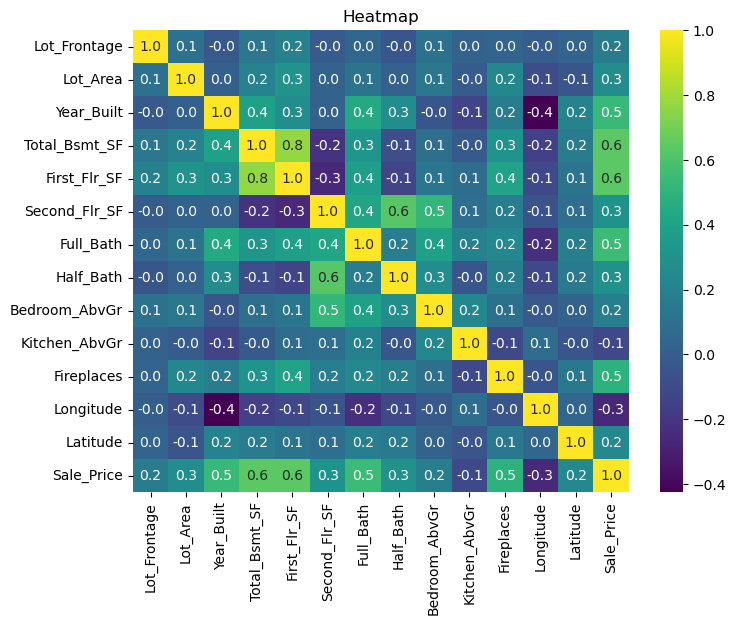

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
dataplot = sns.heatmap(housing_dataset.corr(), cmap="viridis", annot=True, fmt='.1f')
plt.title('Heatmap')
plt.show()

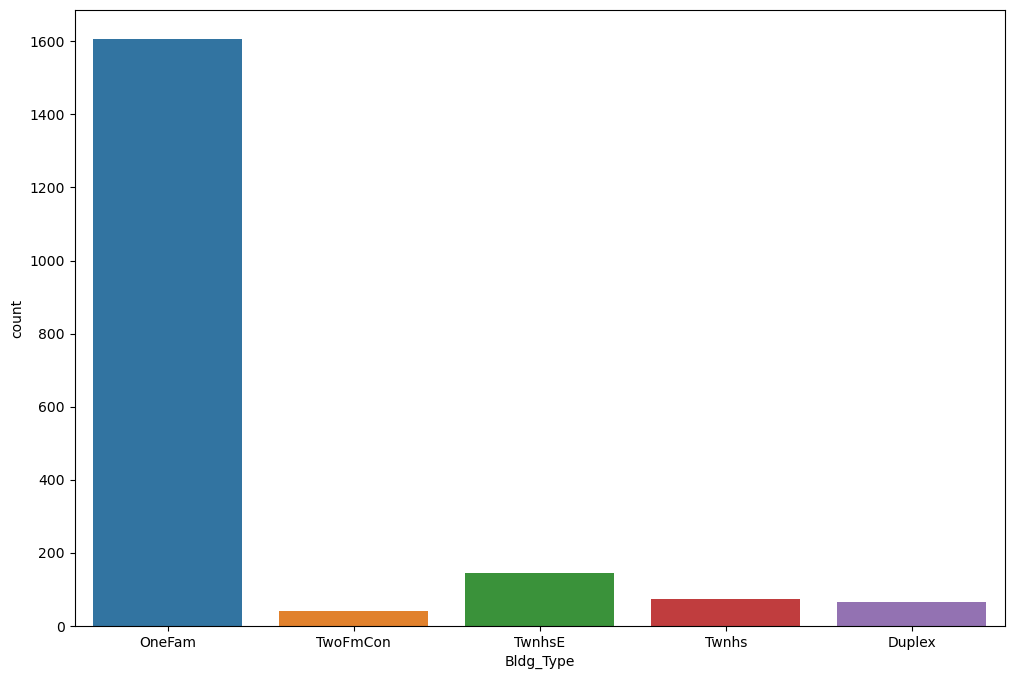

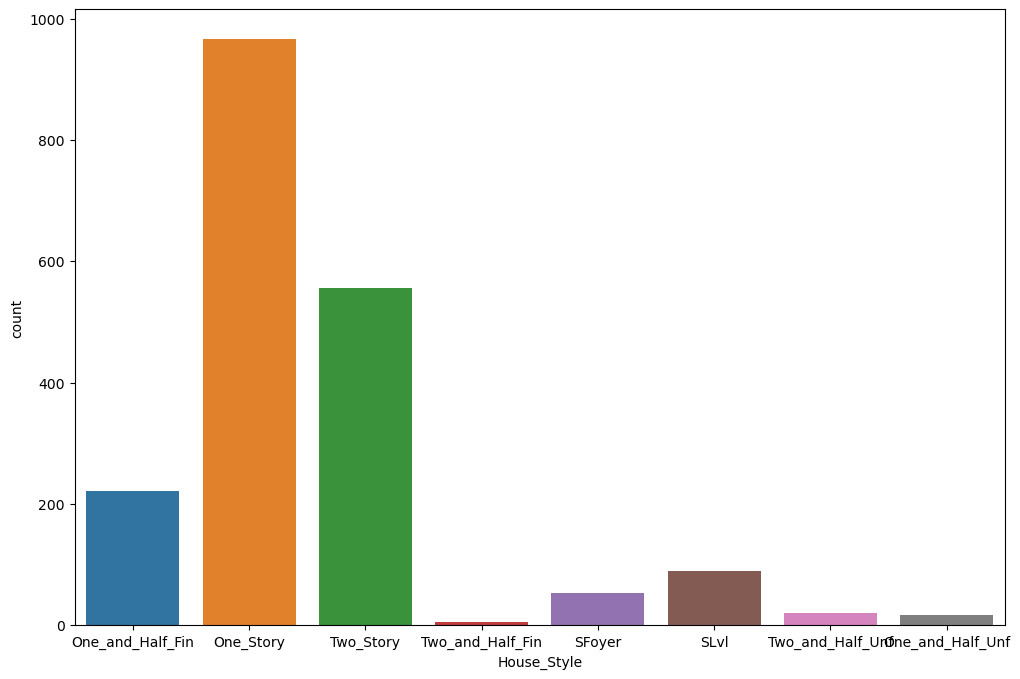

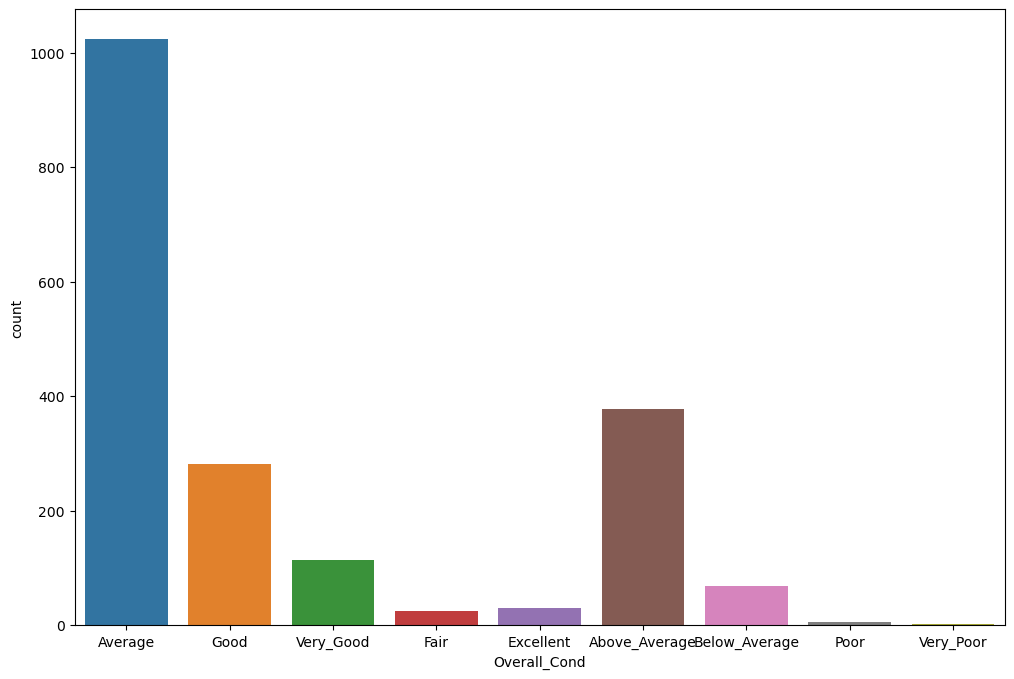

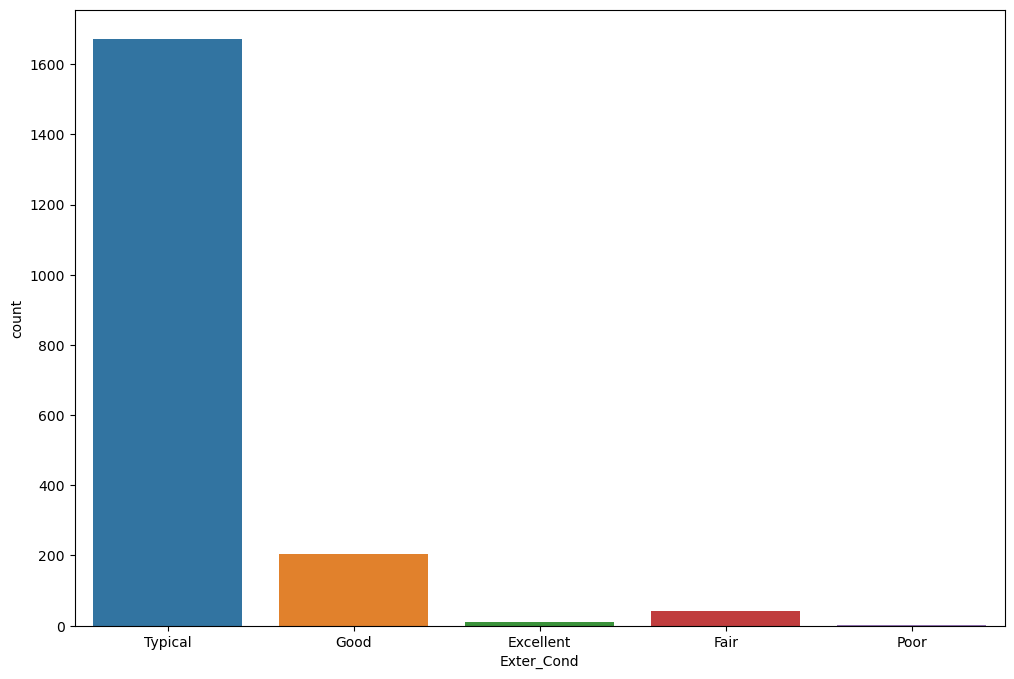

In [14]:
for column in descriptive:
    plt.figure(figsize=(12, 8))
    sns.countplot(x =column, data = X_train)
    plt.show()


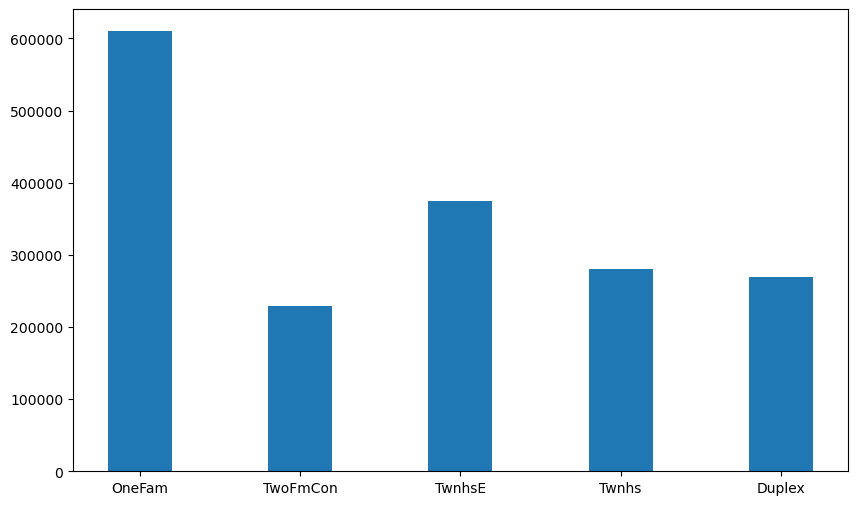

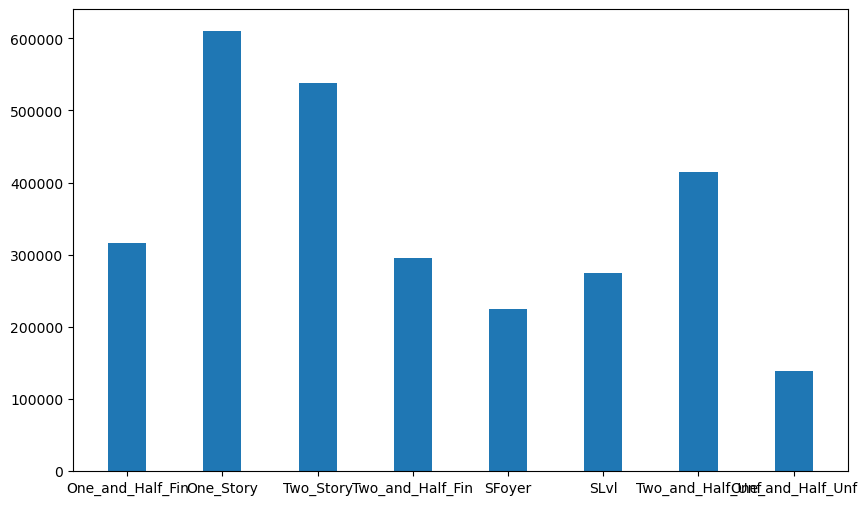

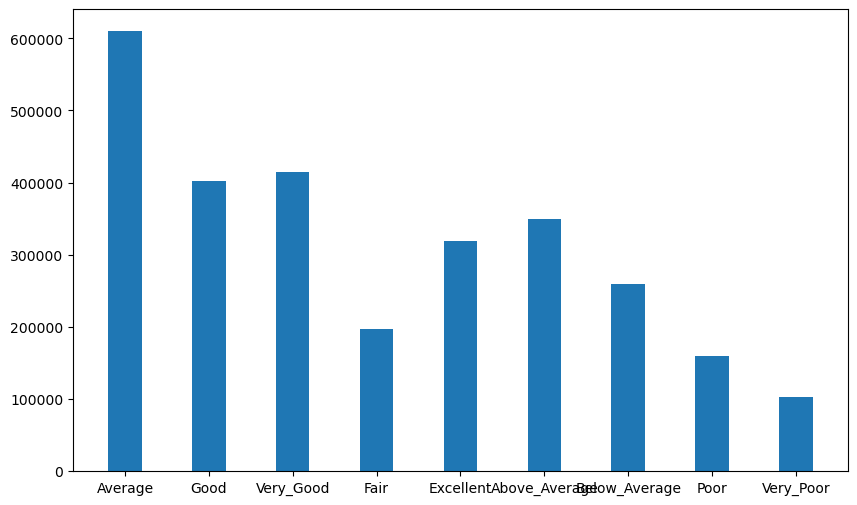

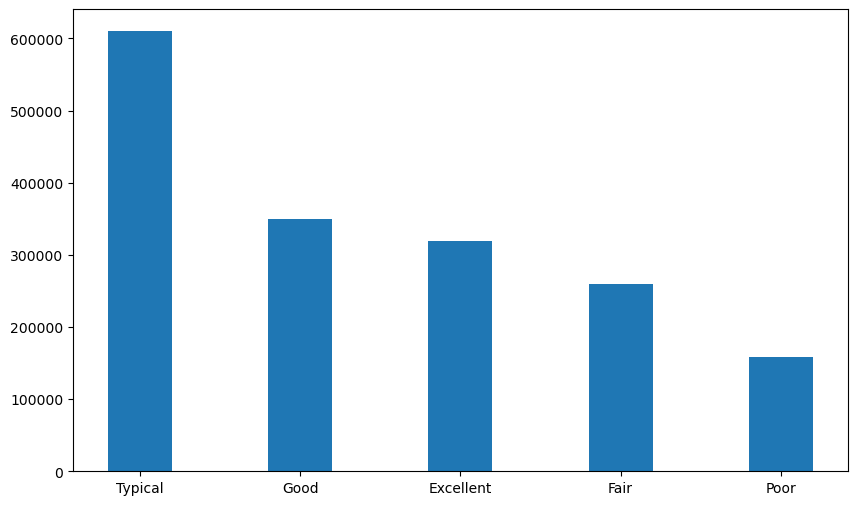

In [15]:
for column in descriptive:
    plt.figure(figsize=(10, 6))
    plt.bar(X_train[column], Y_train, width = 0.4)
    plt.show()


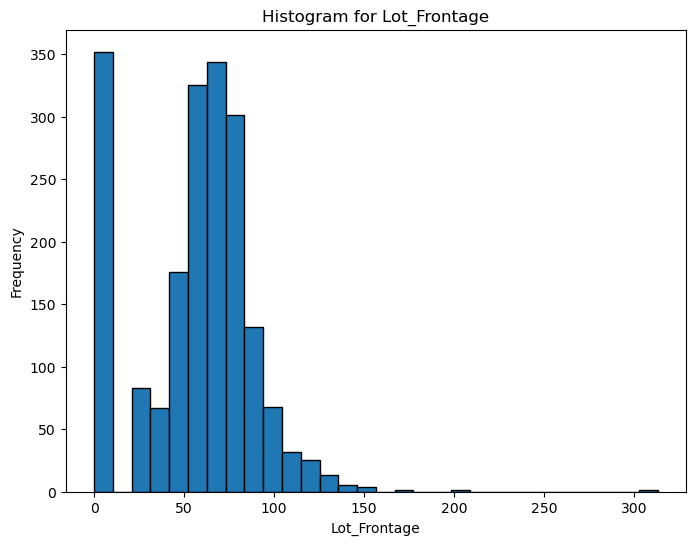

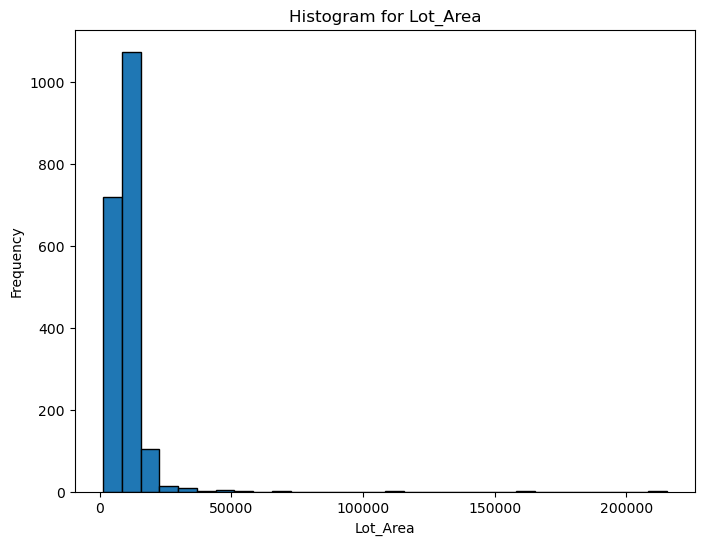

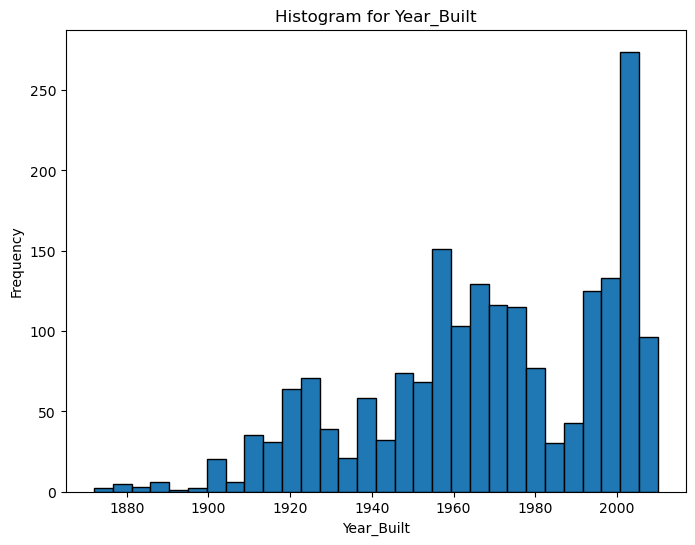

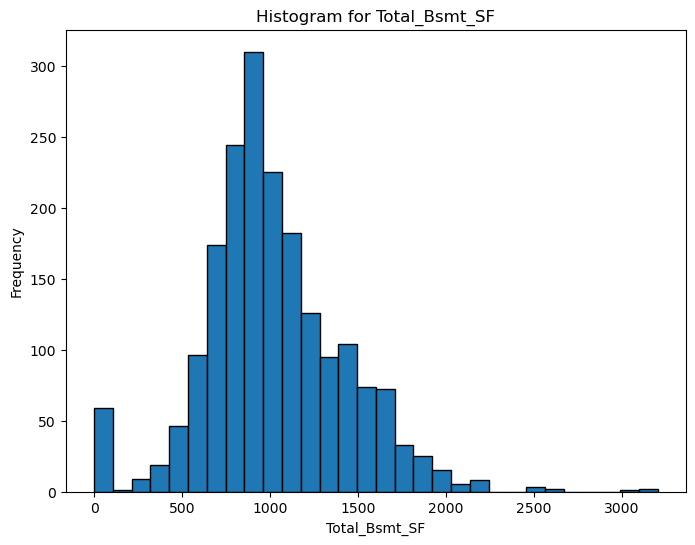

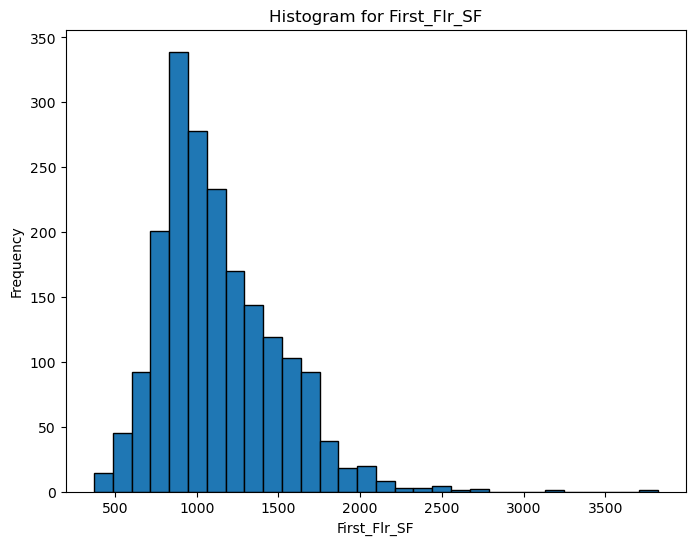

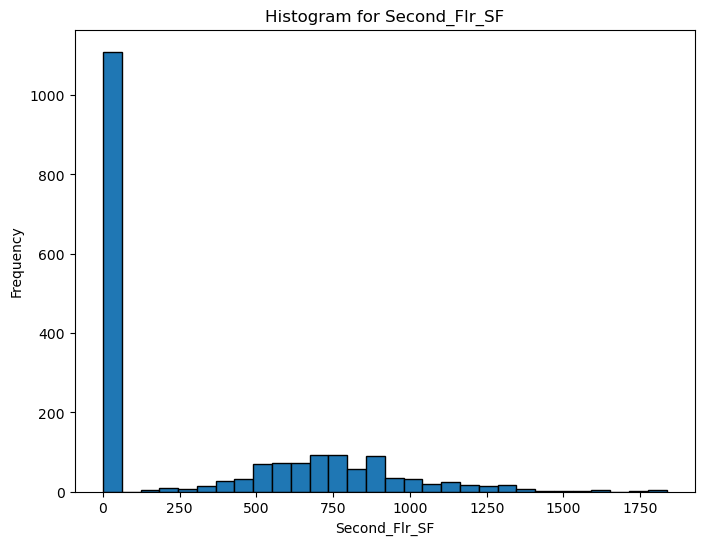

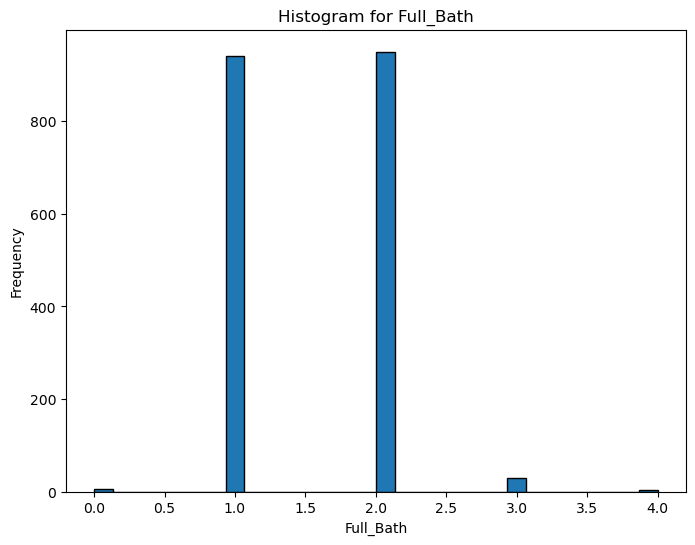

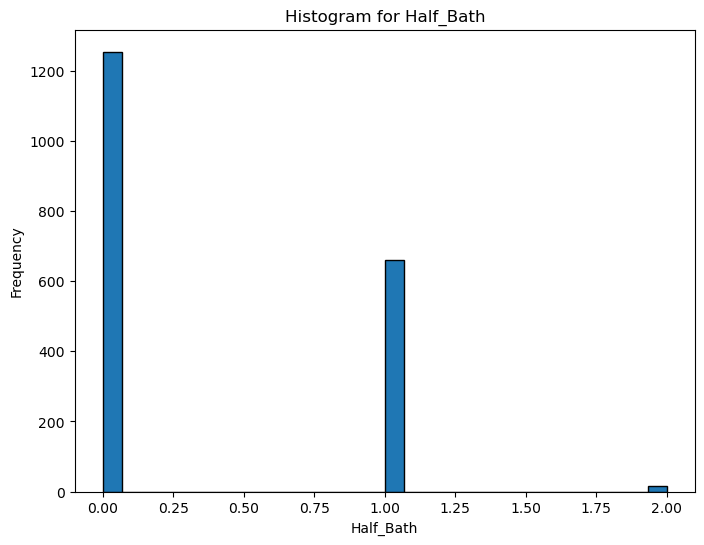

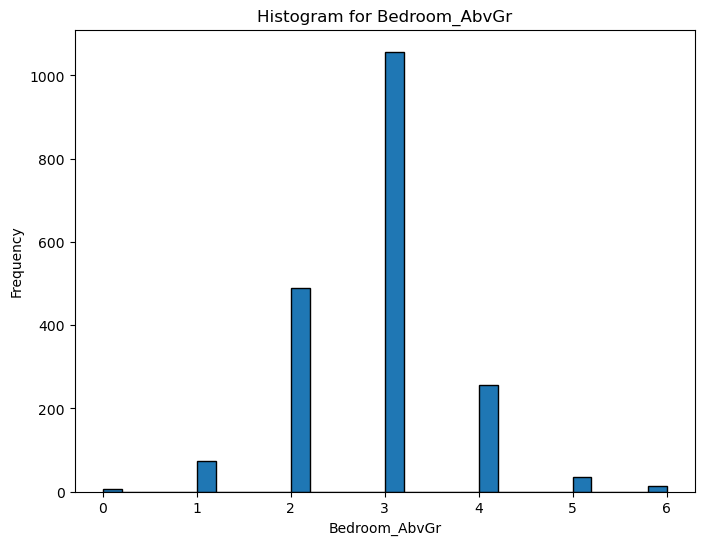

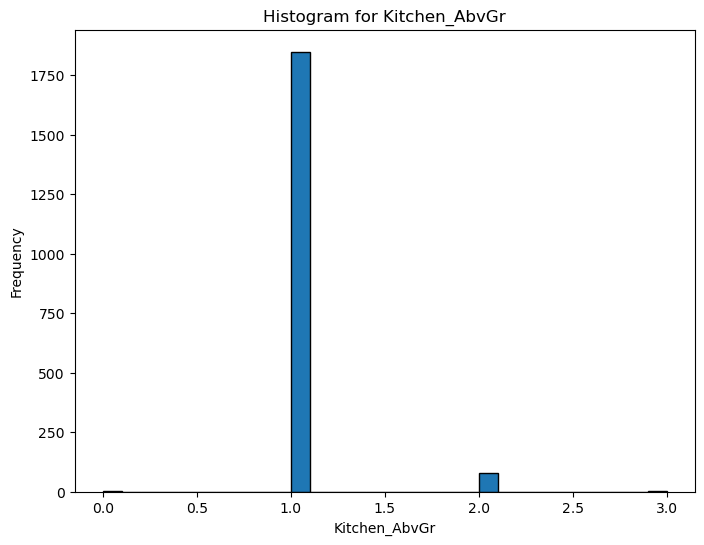

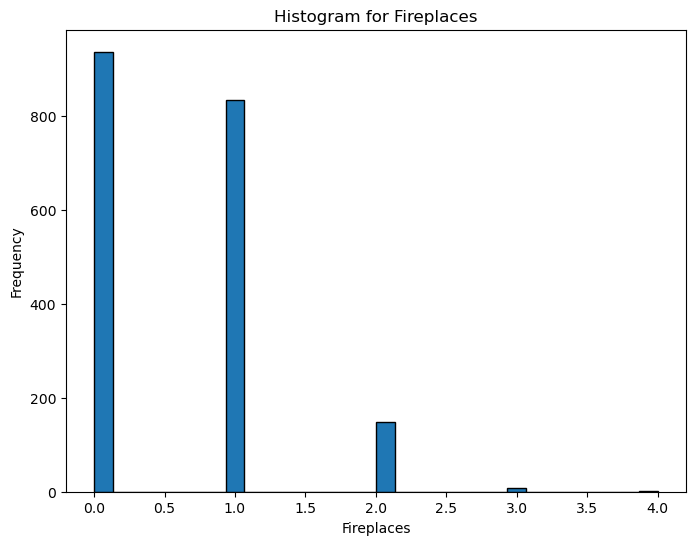

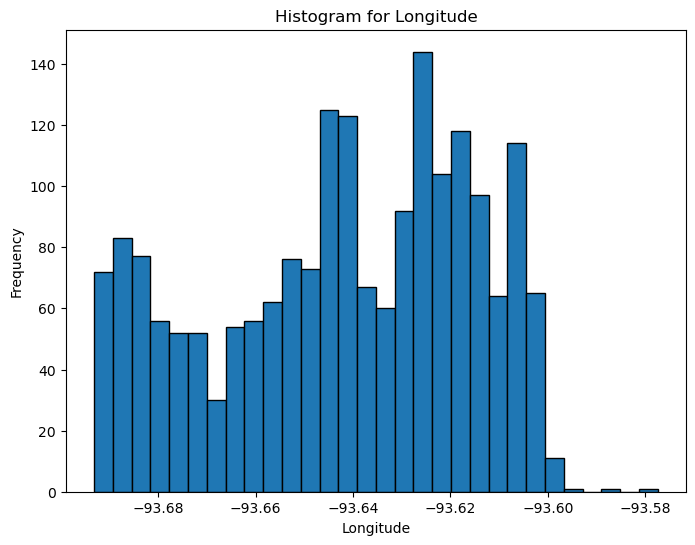

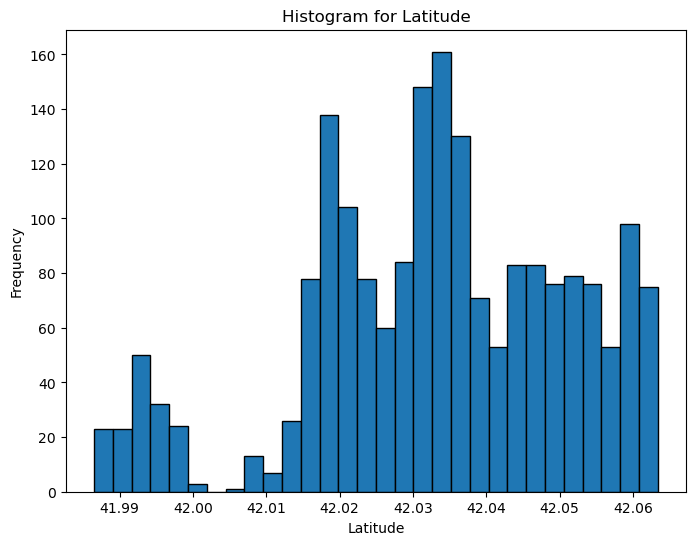

In [16]:

for column in quantitative:
    plt.figure(figsize=(8, 6))  
    plt.hist(X_train[column], bins=30, edgecolor='black') 
    plt.title(f'Histogram for {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency')
    plt.show()
    


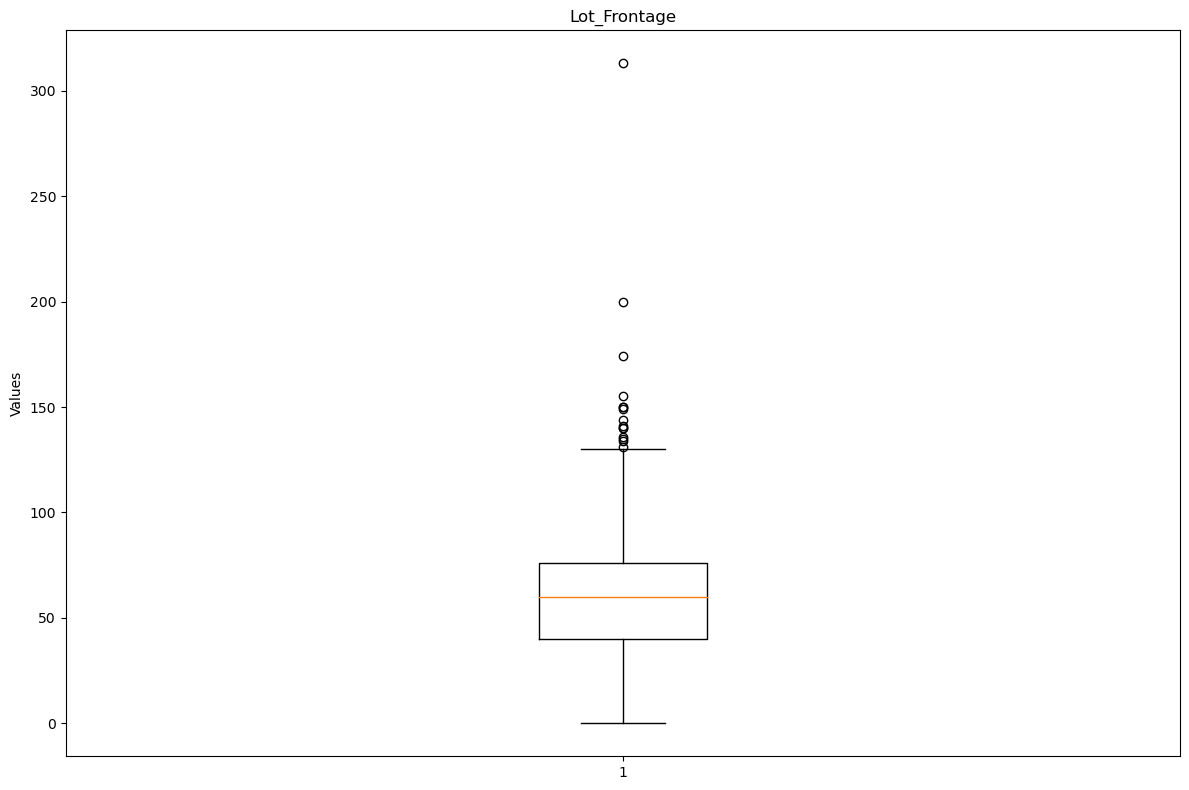

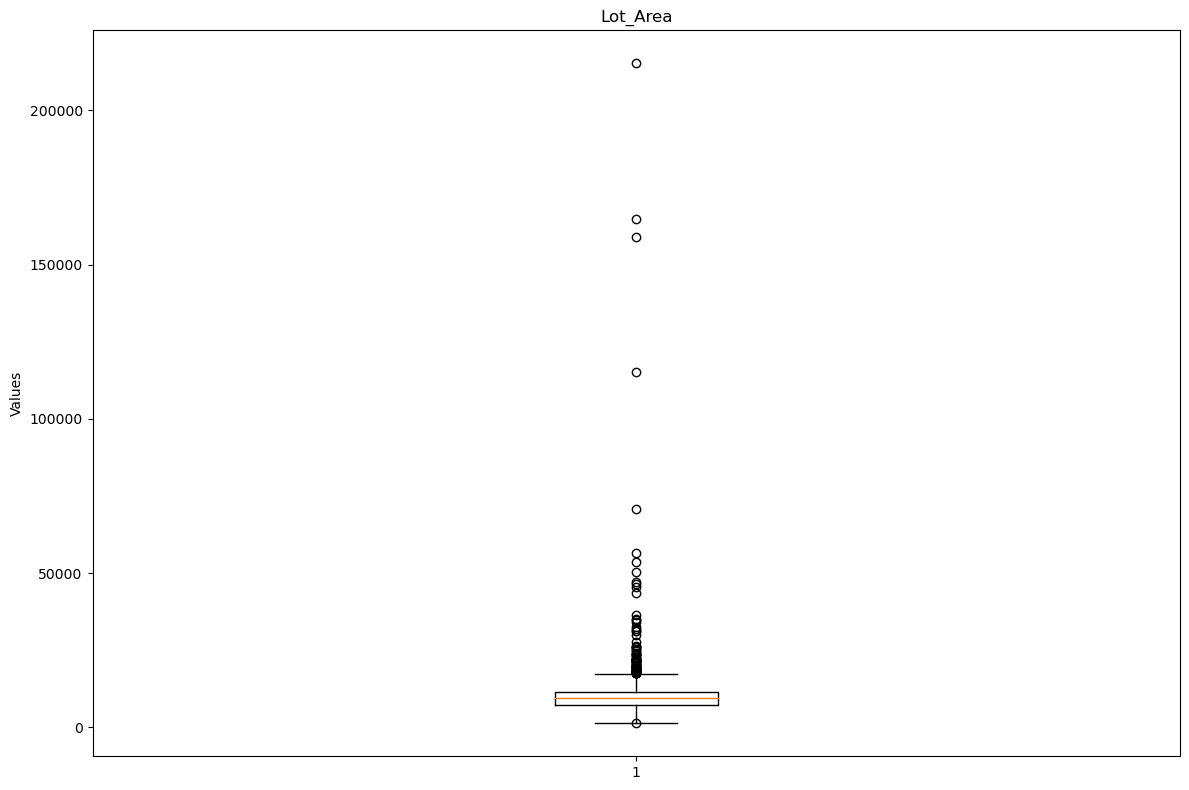

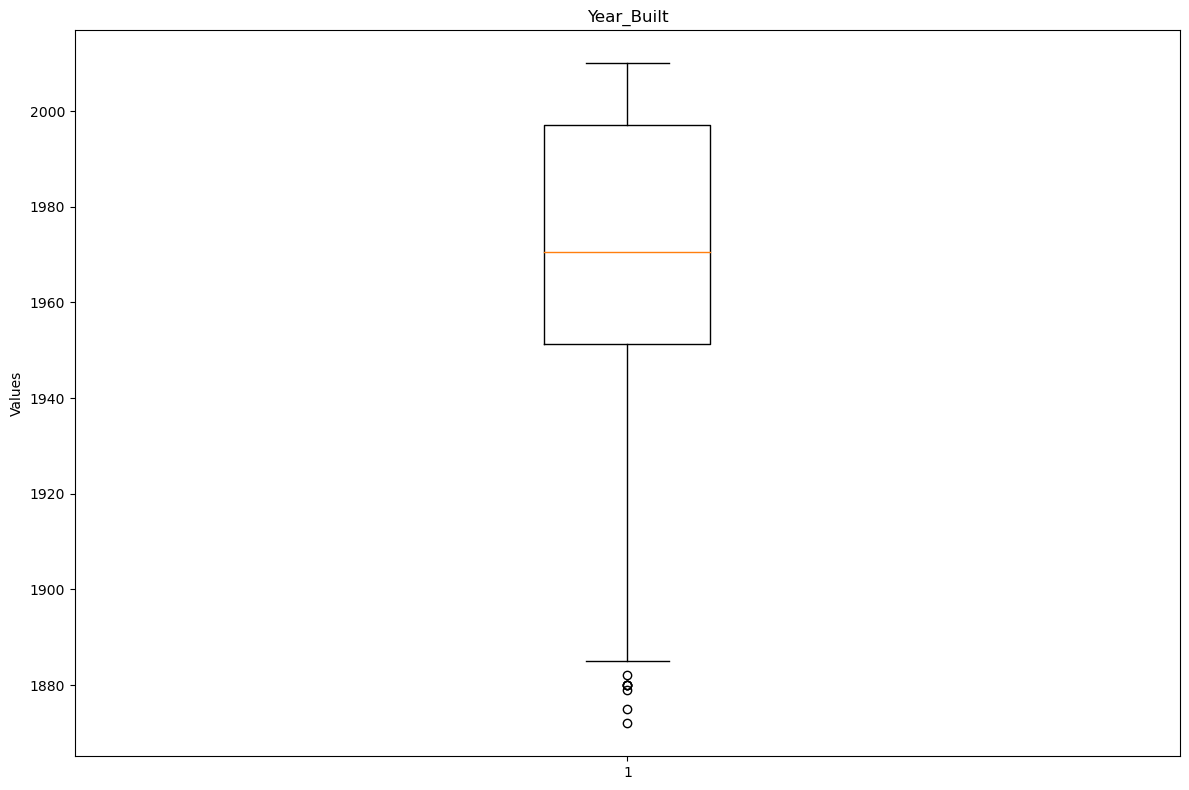

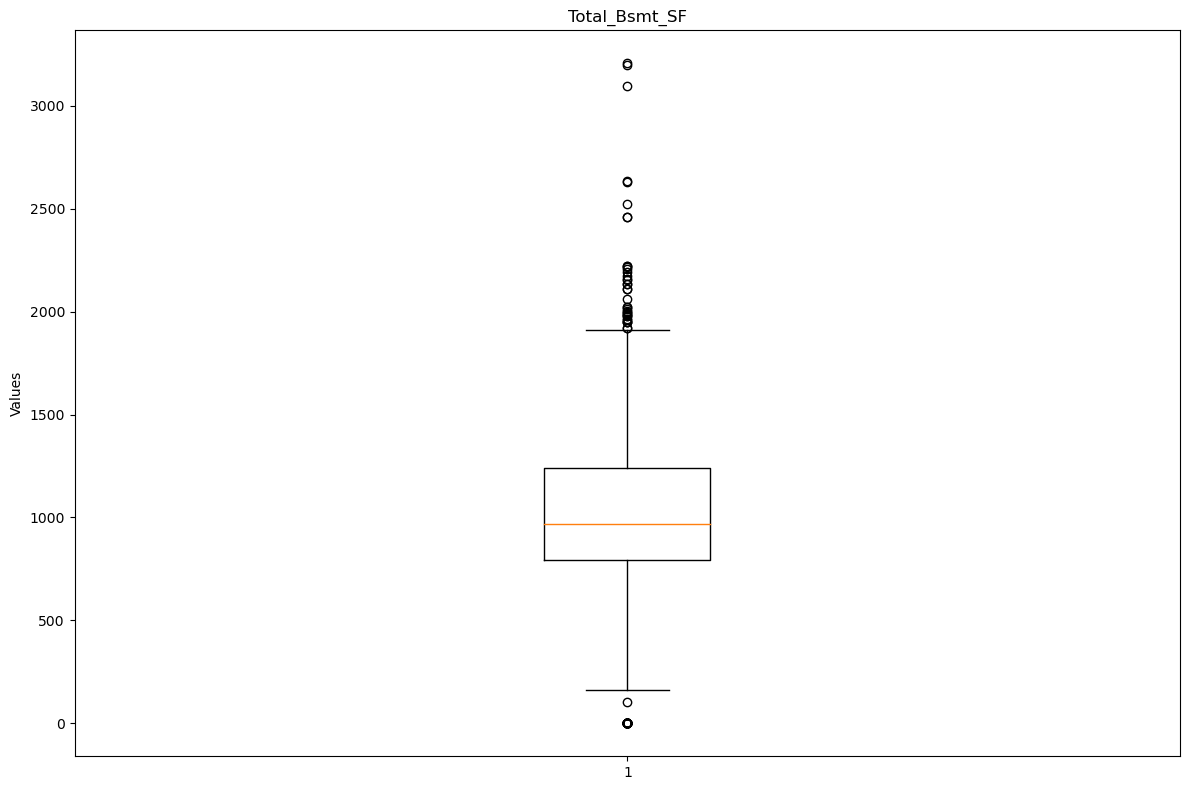

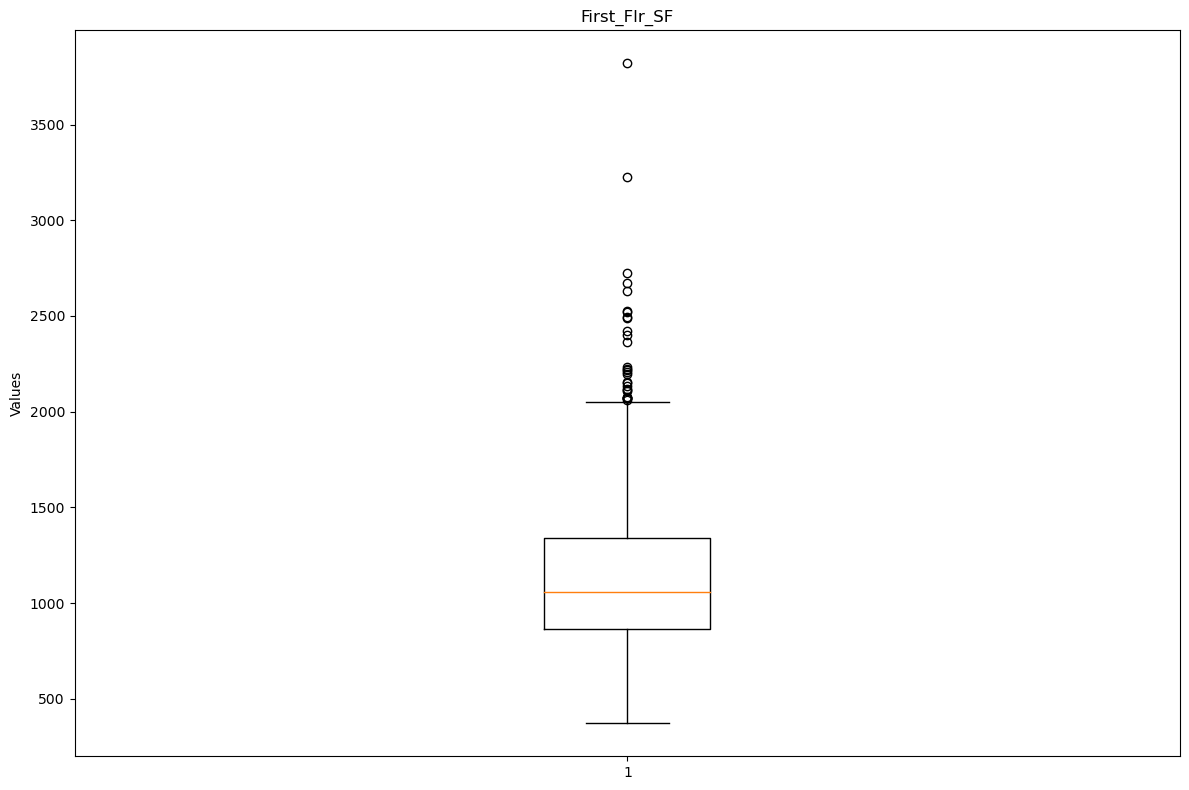

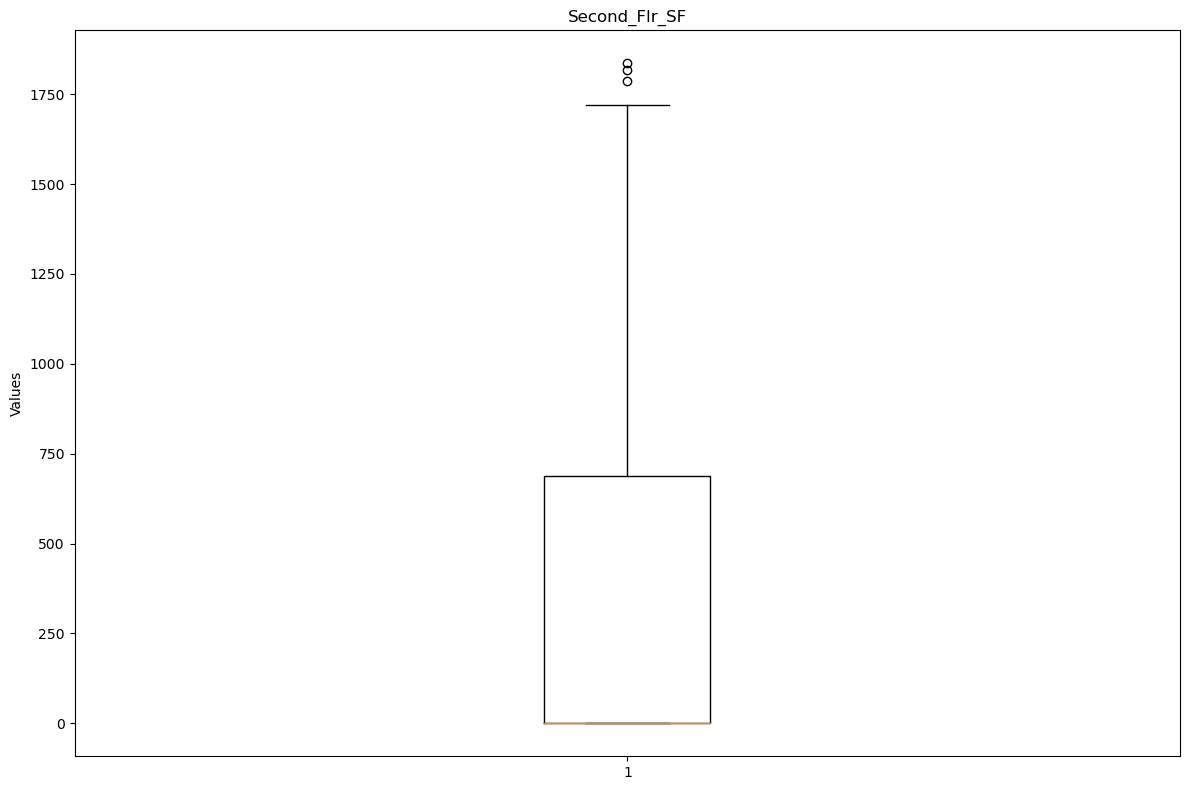

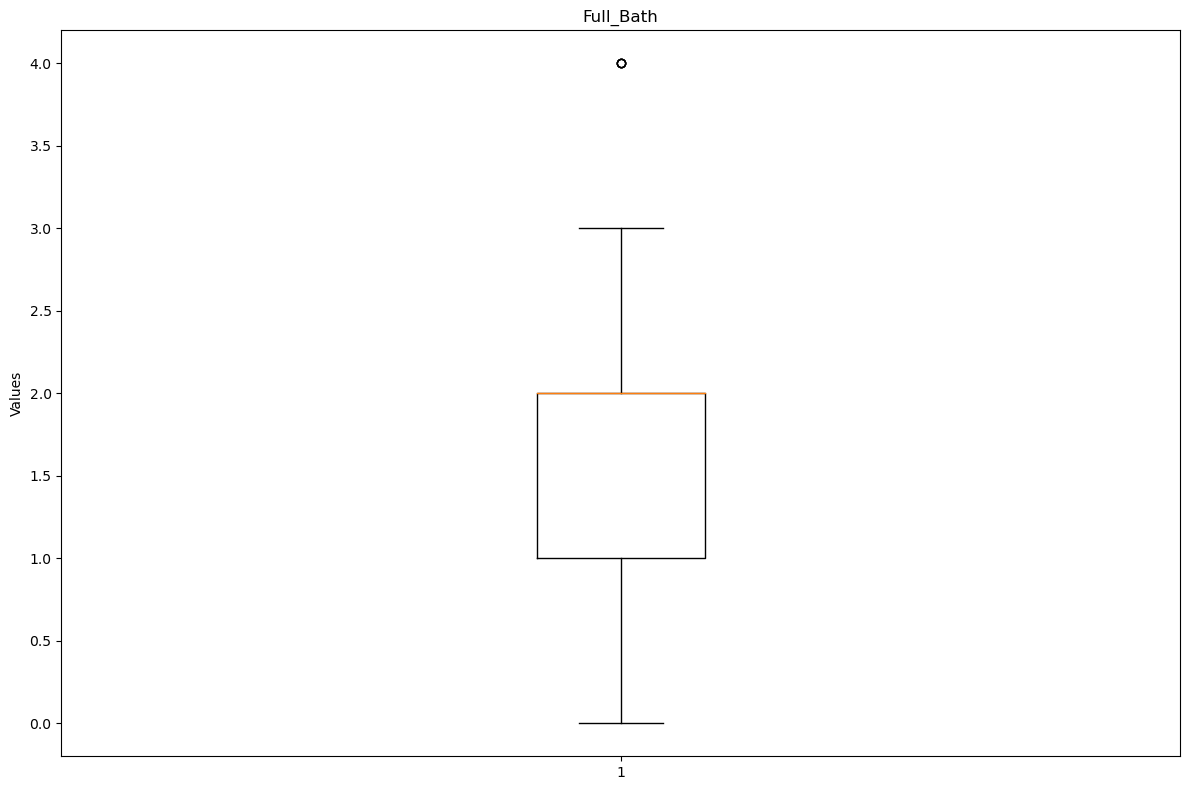

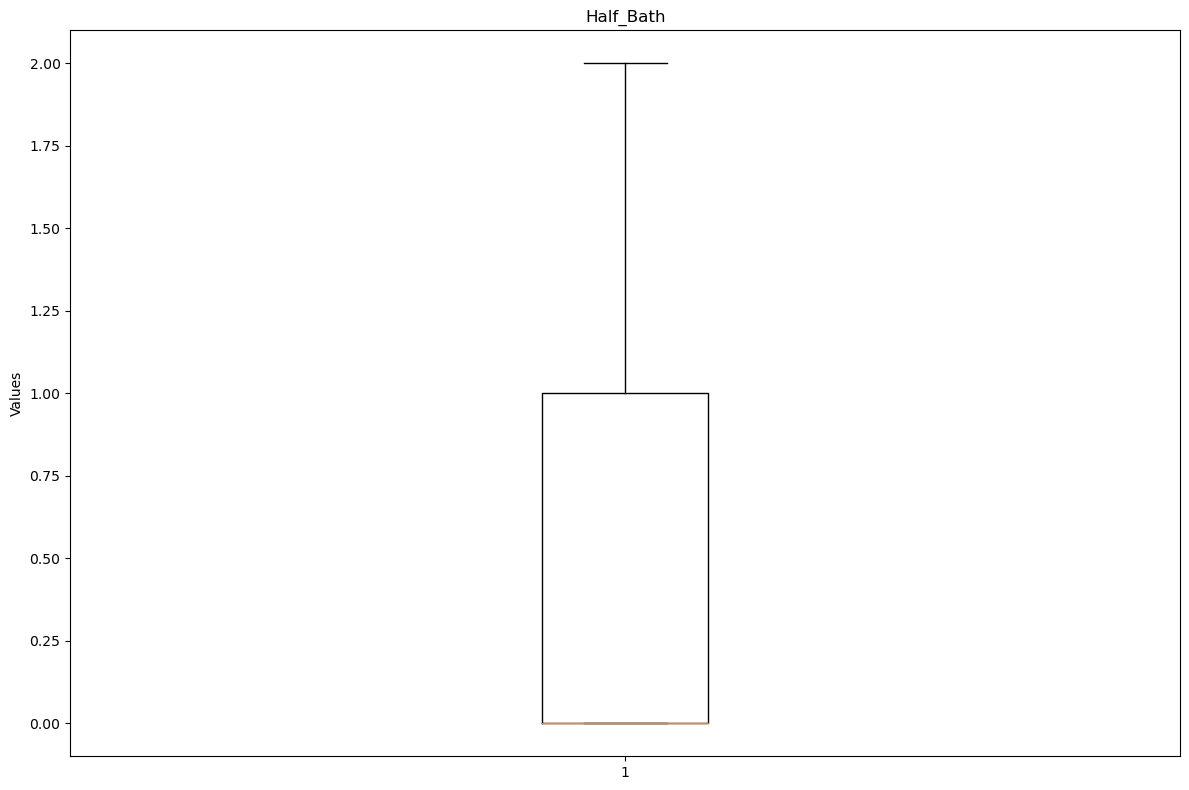

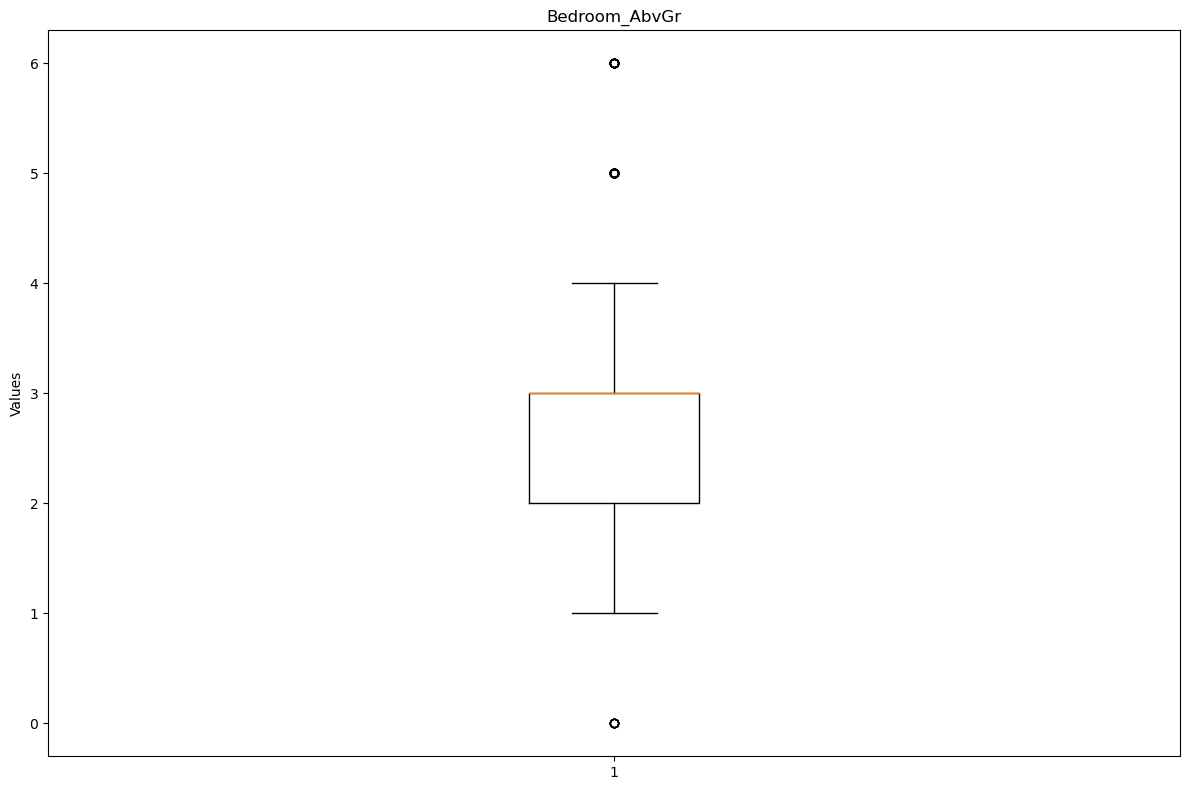

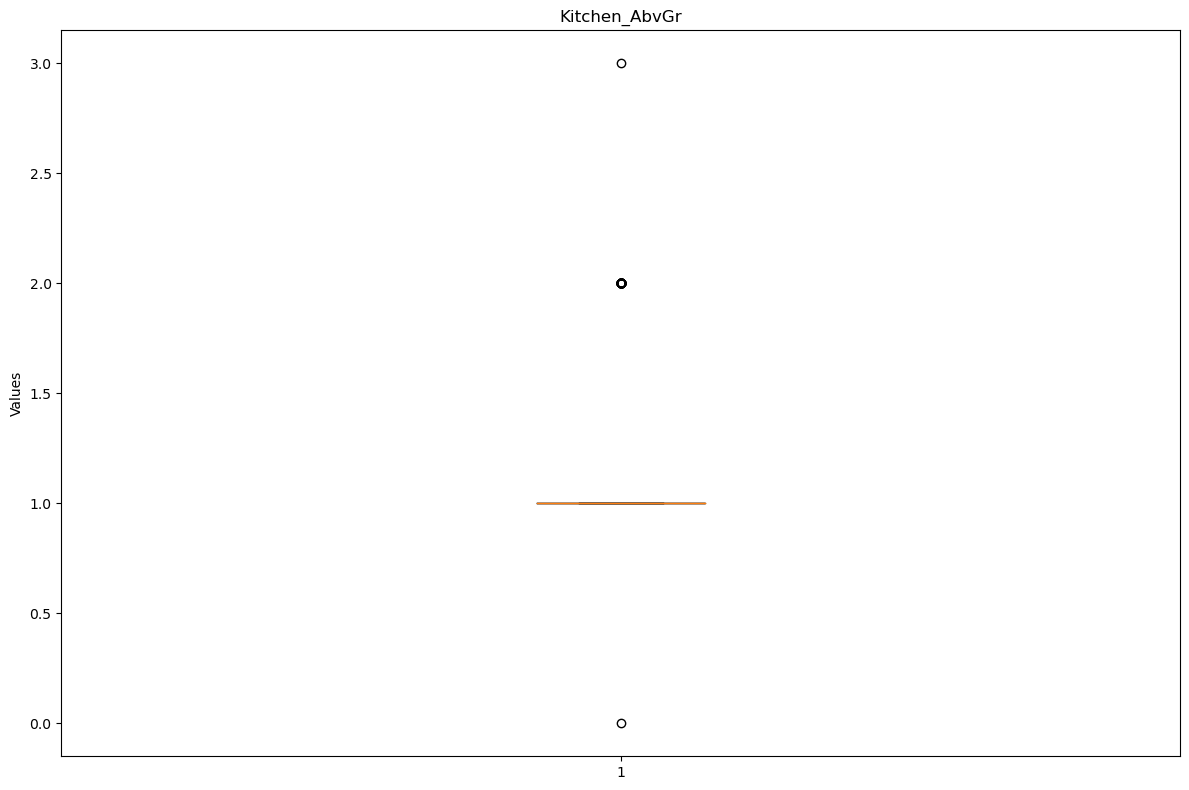

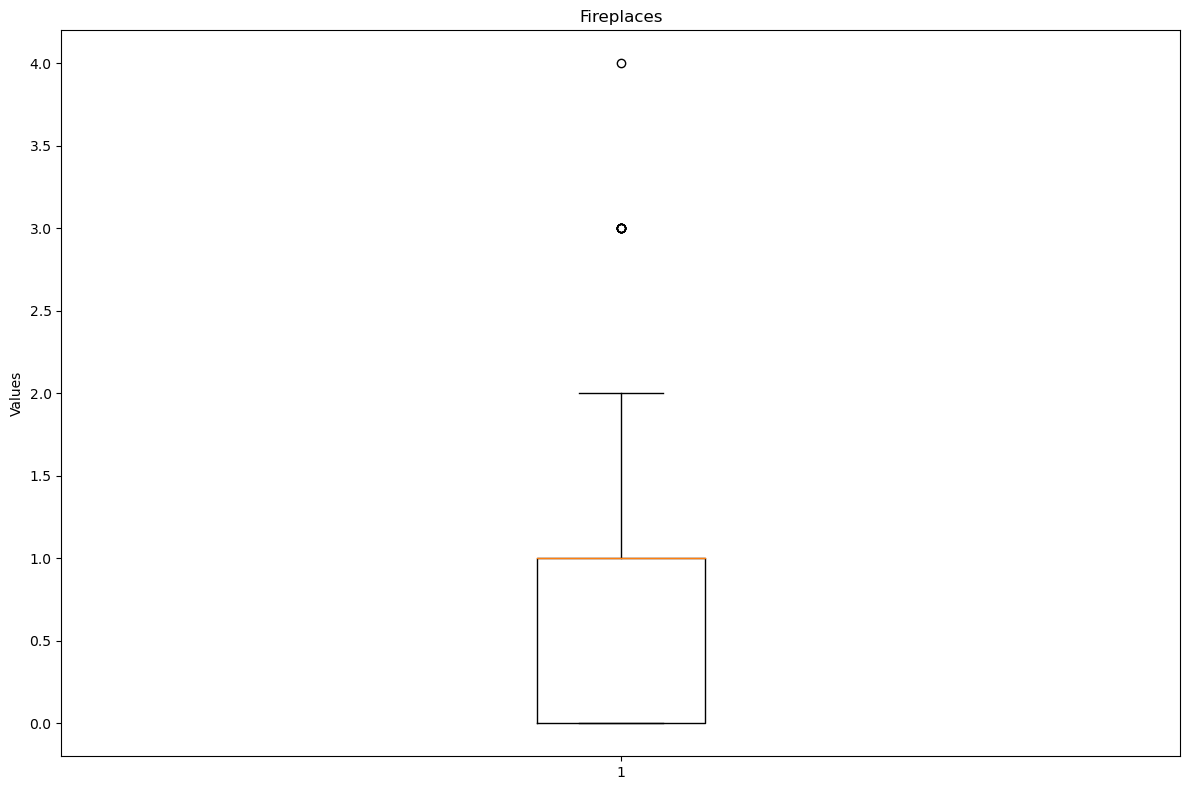

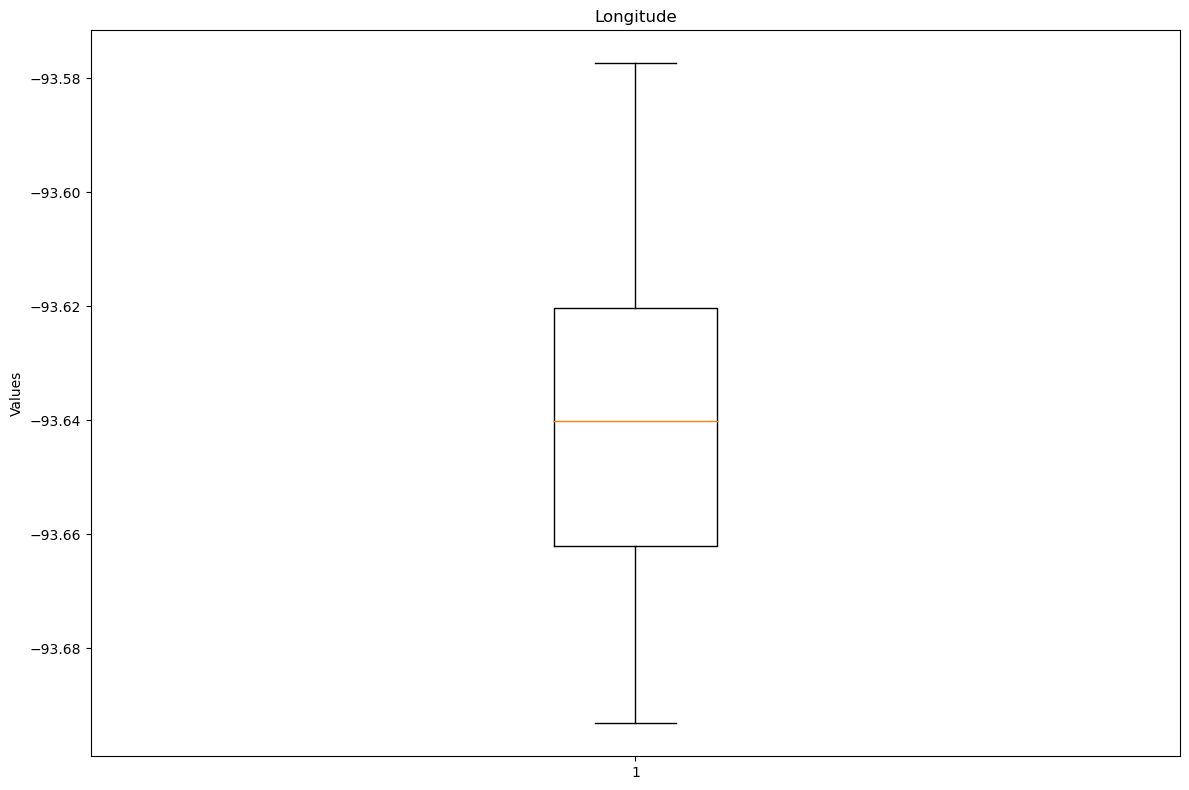

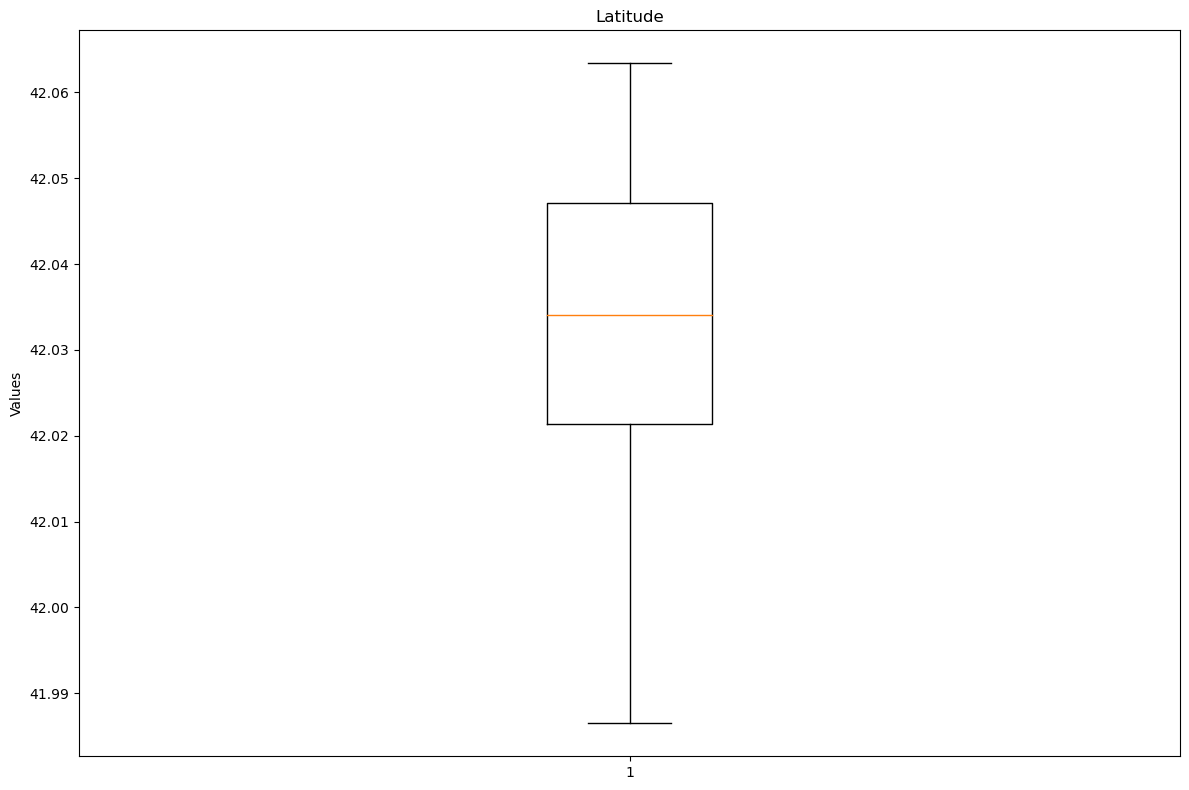

In [17]:
for column in quantitative:
    plt.figure(figsize=(12, 8))
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


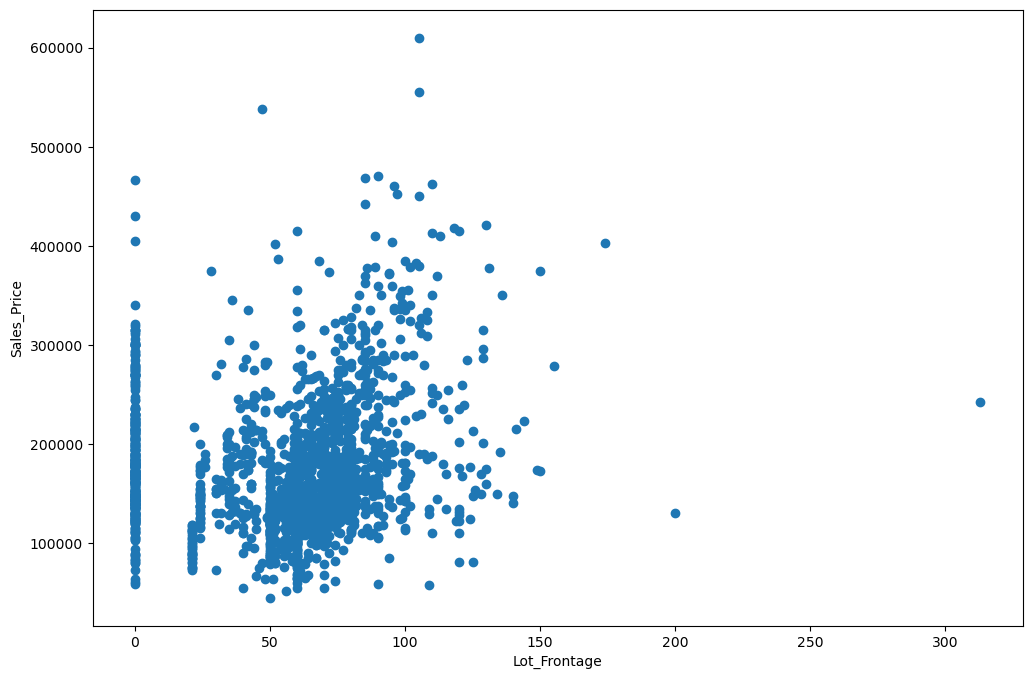

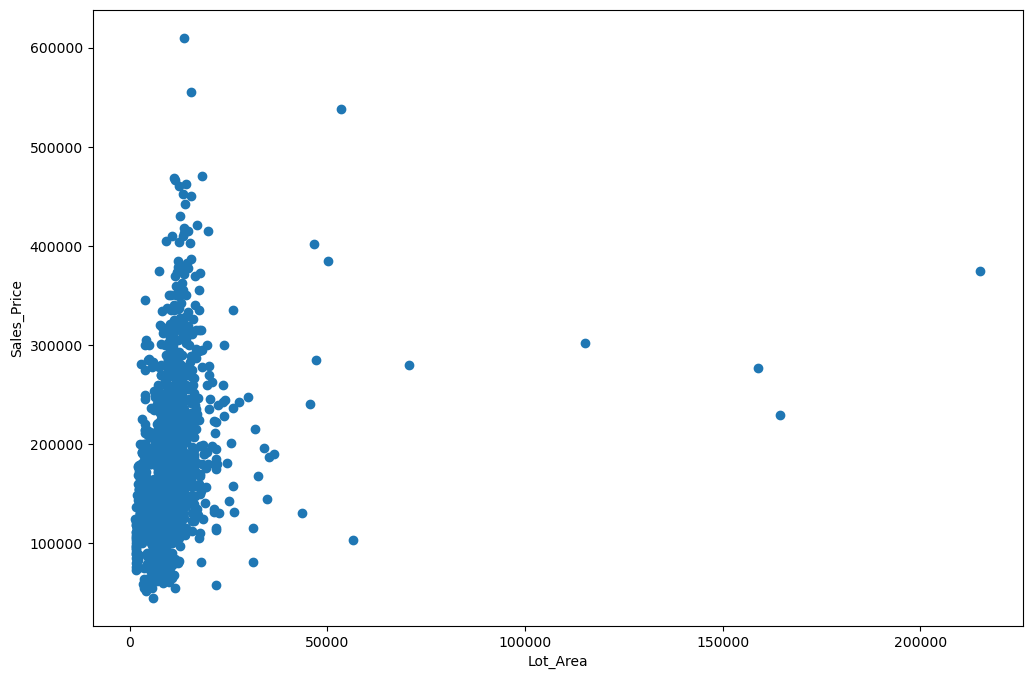

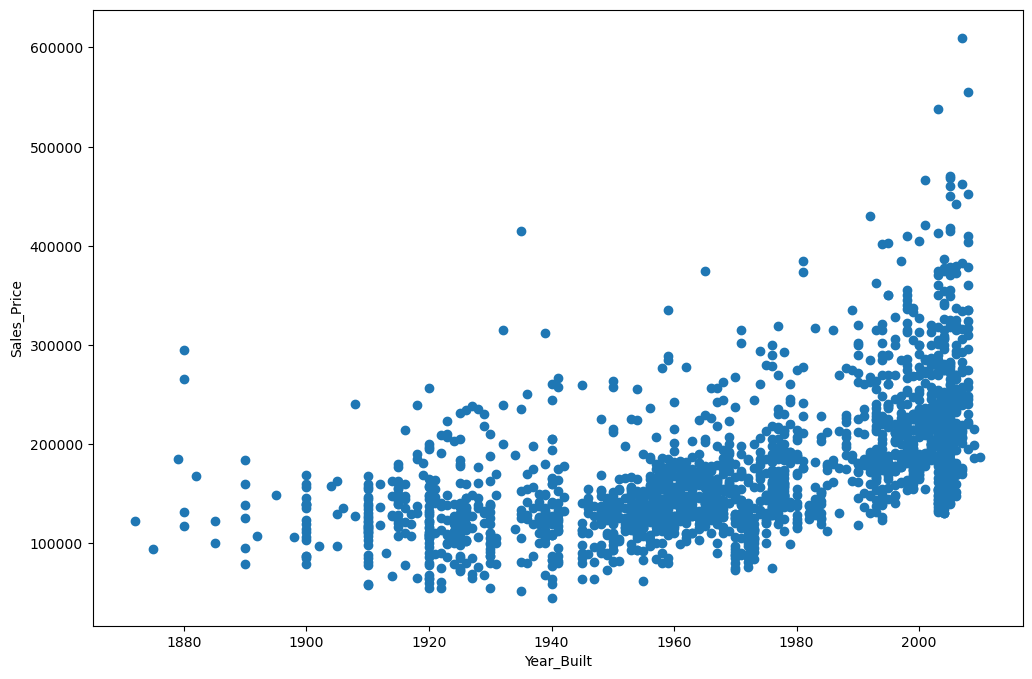

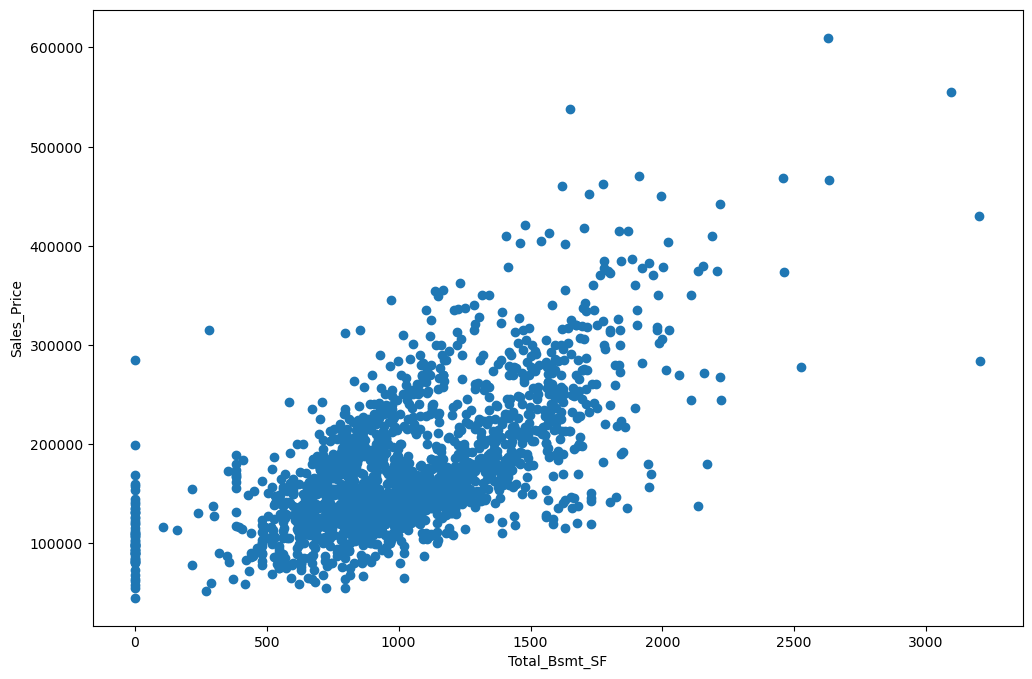

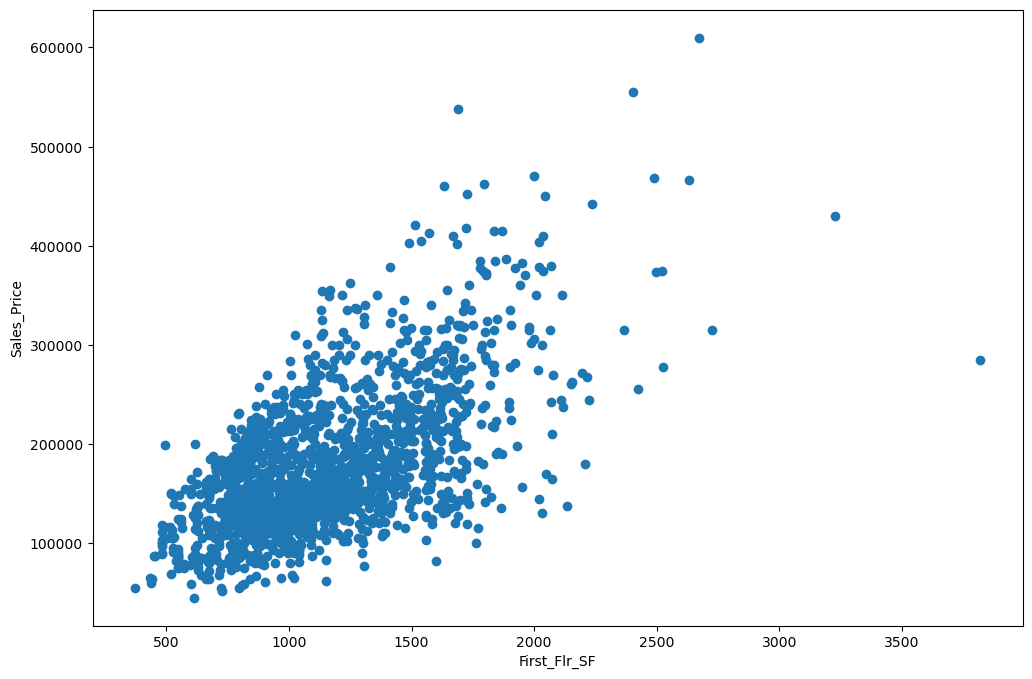

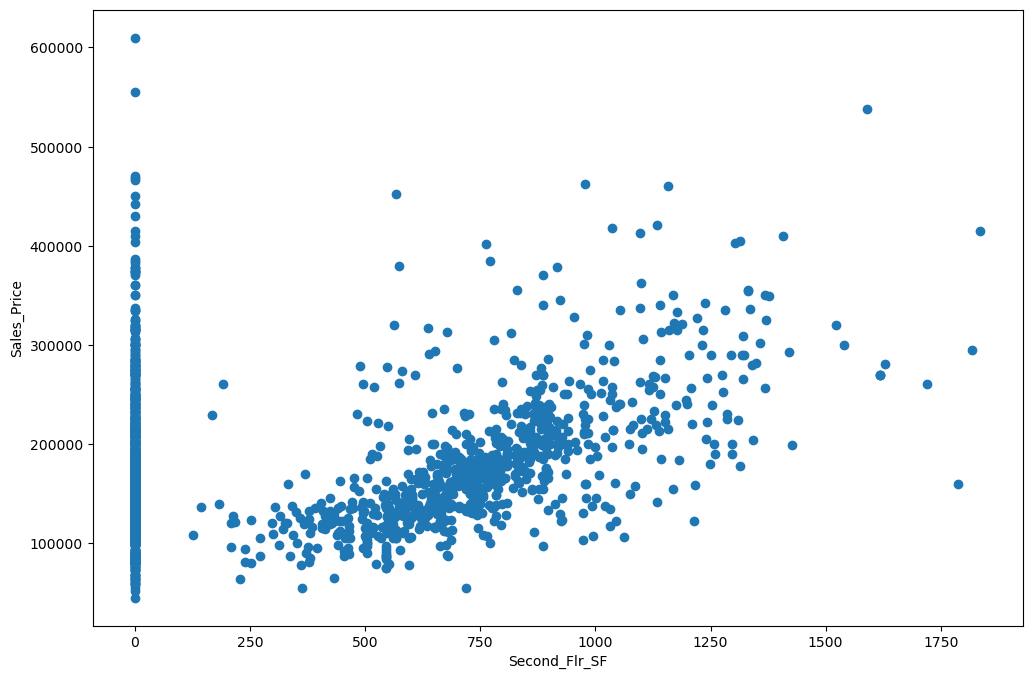

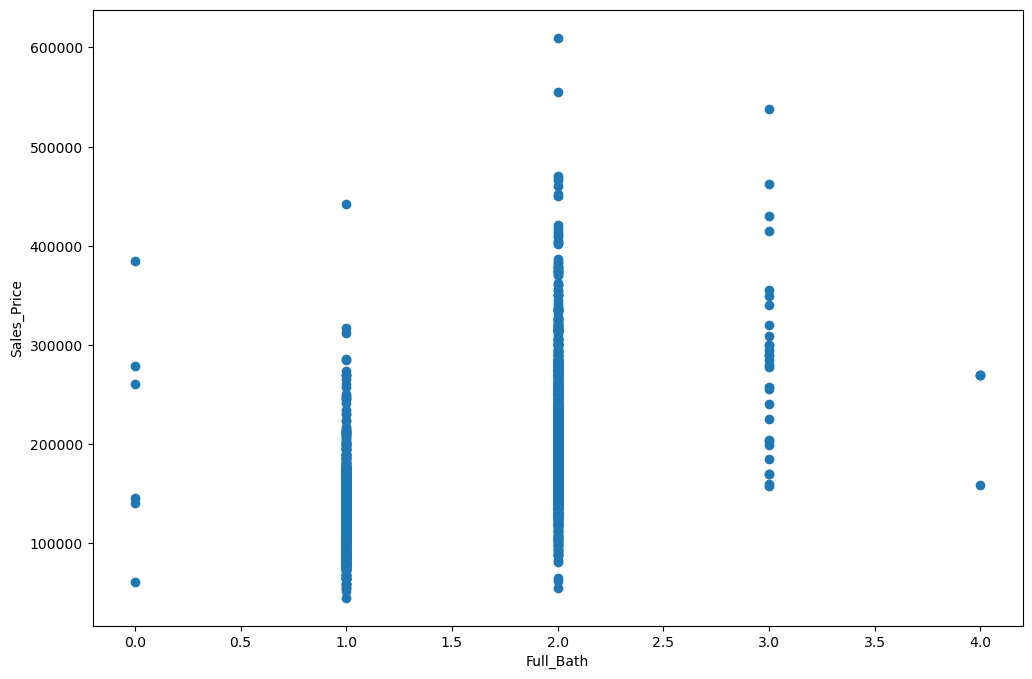

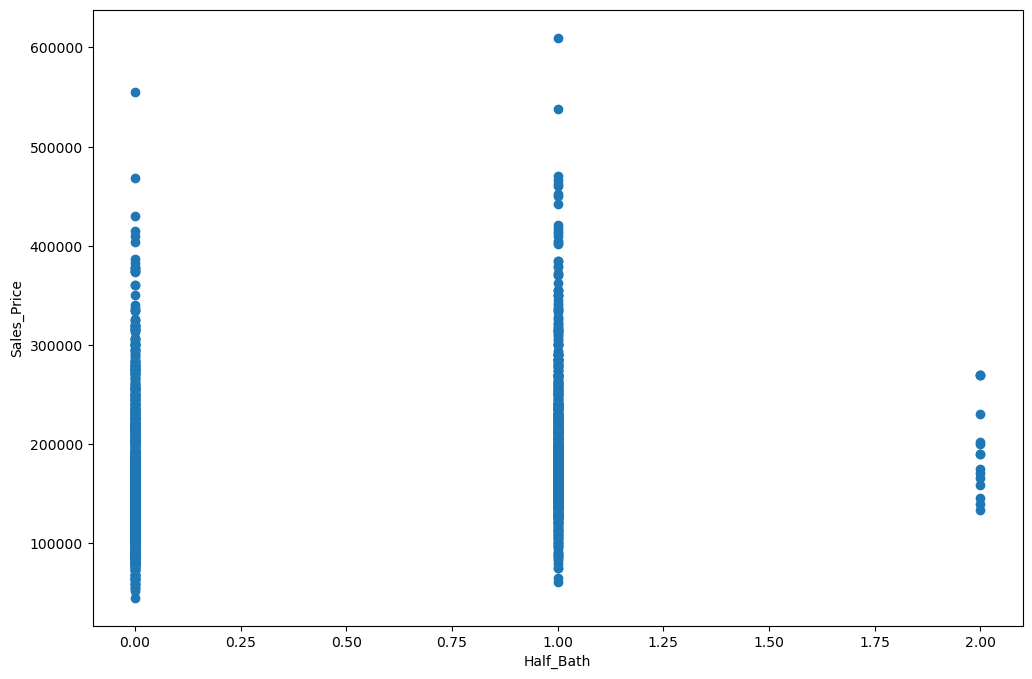

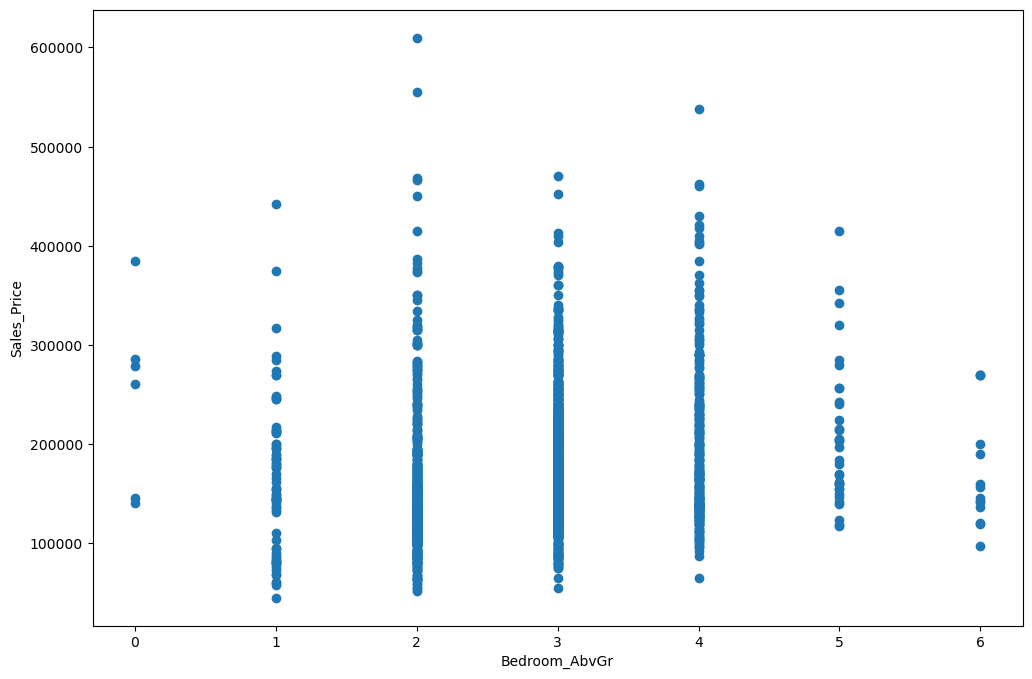

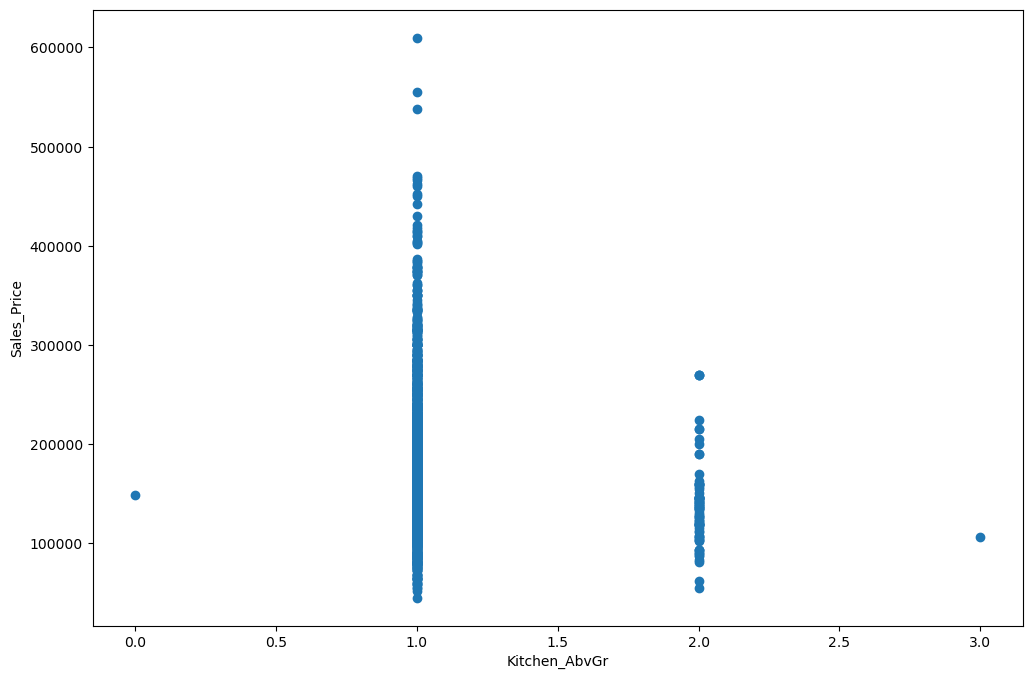

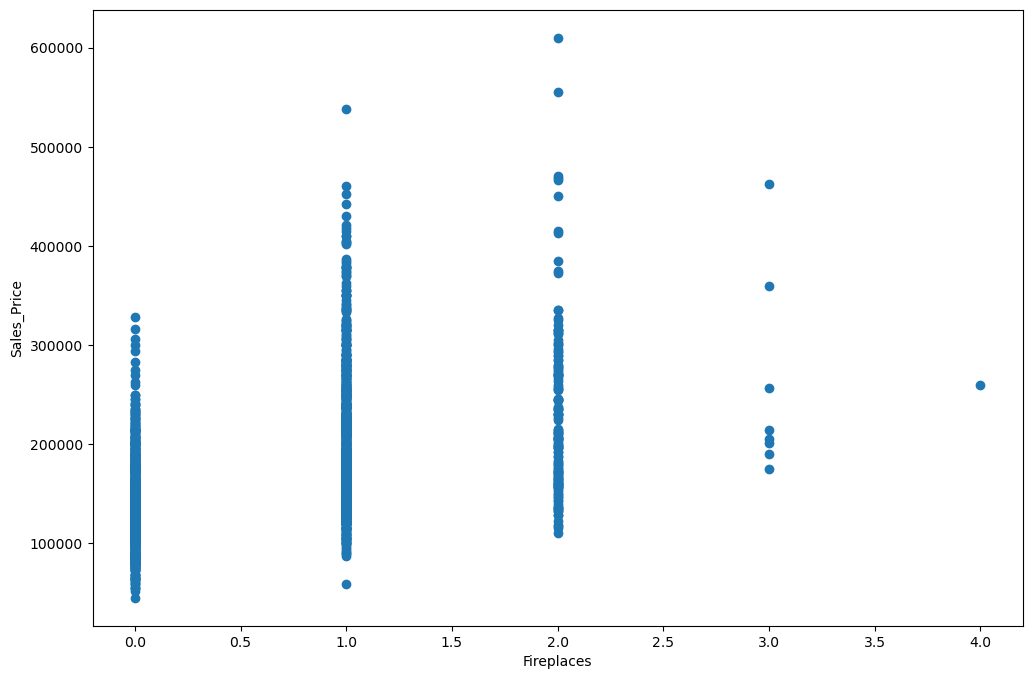

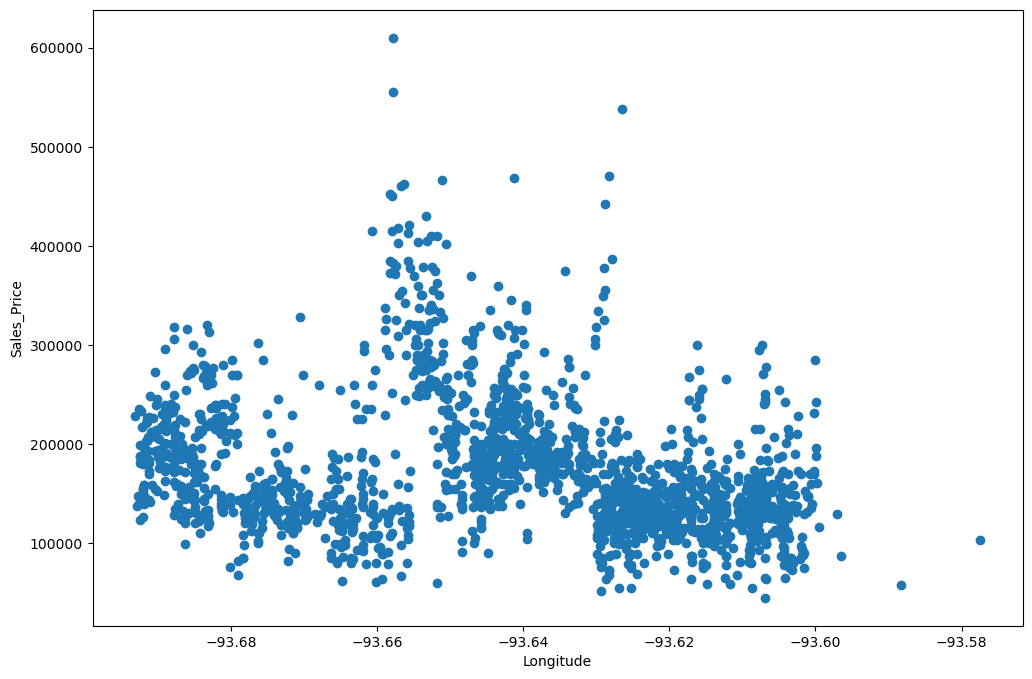

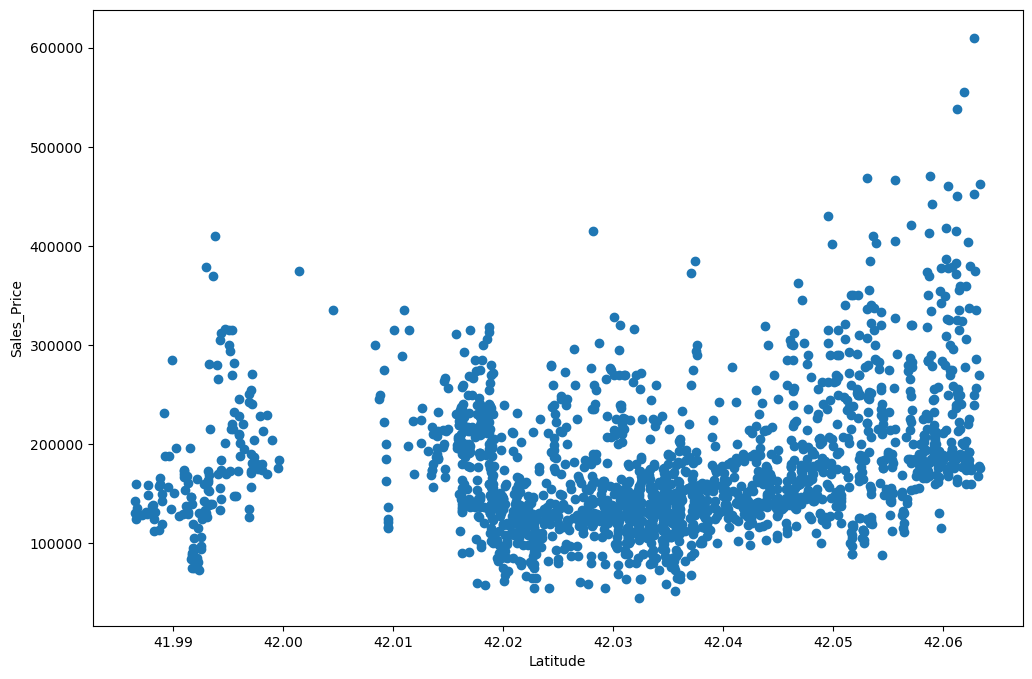

In [18]:
for column in quantitative:
    plt.figure(figsize=(12, 8))
    plt.scatter(X_train[column], Y_train)
    plt.ylabel('Sales_Price')
    plt.xlabel(column)
    plt.show()


In [19]:
label_encoder = preprocessing.LabelEncoder() 
X_train['Exter_Cond']= label_encoder.fit_transform(X_train['Exter_Cond'])
X_train['Overall_Cond']= label_encoder.fit_transform(X_train['Overall_Cond'])
X_train['Bldg_Type']= label_encoder.fit_transform(X_train['Bldg_Type'])
X_train['House_Style']= label_encoder.fit_transform(X_train['House_Style'])
X_test['Exter_Cond']= label_encoder.fit_transform(X_test['Exter_Cond'])
X_test['Overall_Cond']= label_encoder.fit_transform(X_test['Overall_Cond'])
X_test['Bldg_Type']= label_encoder.fit_transform(X_test['Bldg_Type'])
X_test['House_Style']= label_encoder.fit_transform(X_test['House_Style'])


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_features_train, columns=X_train.columns, index=X_train.index)
scaler = MinMaxScaler()
scaled_features_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_features_test, columns=X_test.columns, index=X_test.index)


In [21]:
train=pd.concat([X_train, Y_train], axis=1)

In [22]:
test=pd.concat([X_test, Y_test], axis=1)

In [23]:
z_scores = np.abs(zscore(train[quantitative]))
threshold = 3
train = train[(z_scores < threshold).all(axis=1)]


In [24]:
X_train=train.drop(columns=['Sale_Price'])
Y_train=train['Sale_Price']


In [25]:
X_test=test.drop(columns=['Sale_Price'])
Y_test=test['Sale_Price']


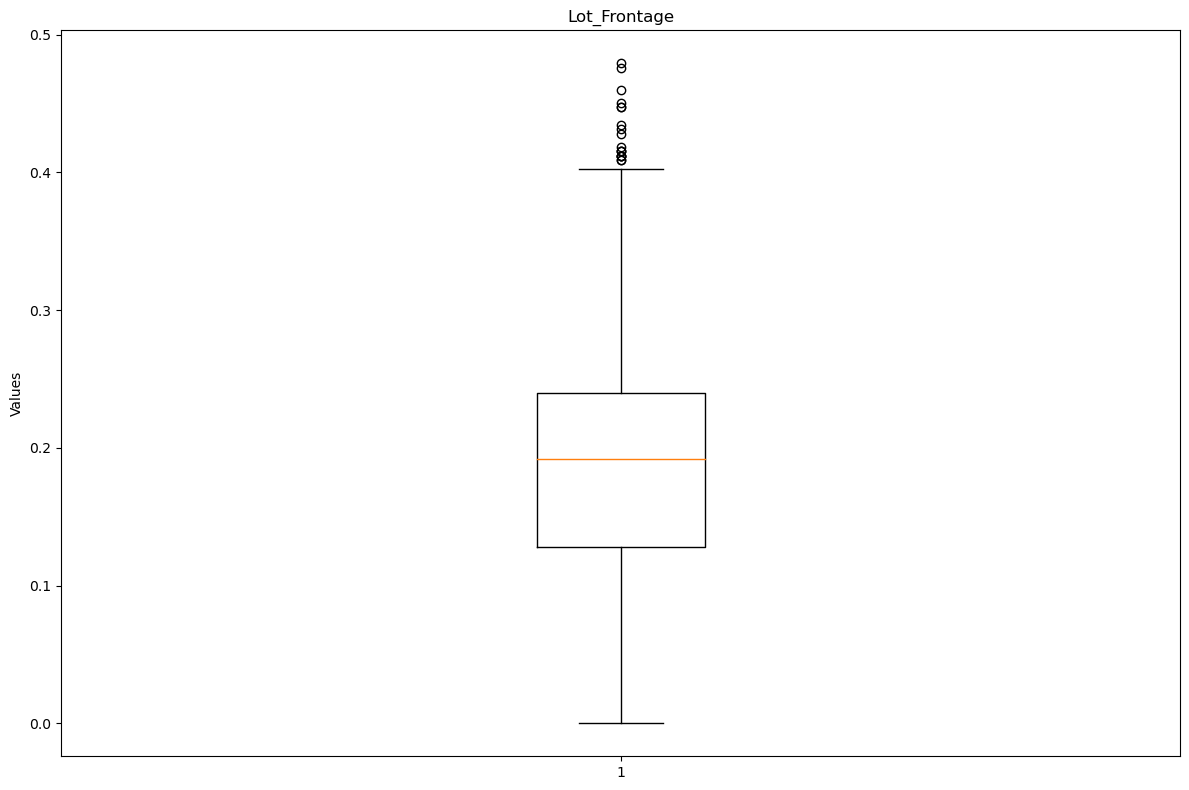

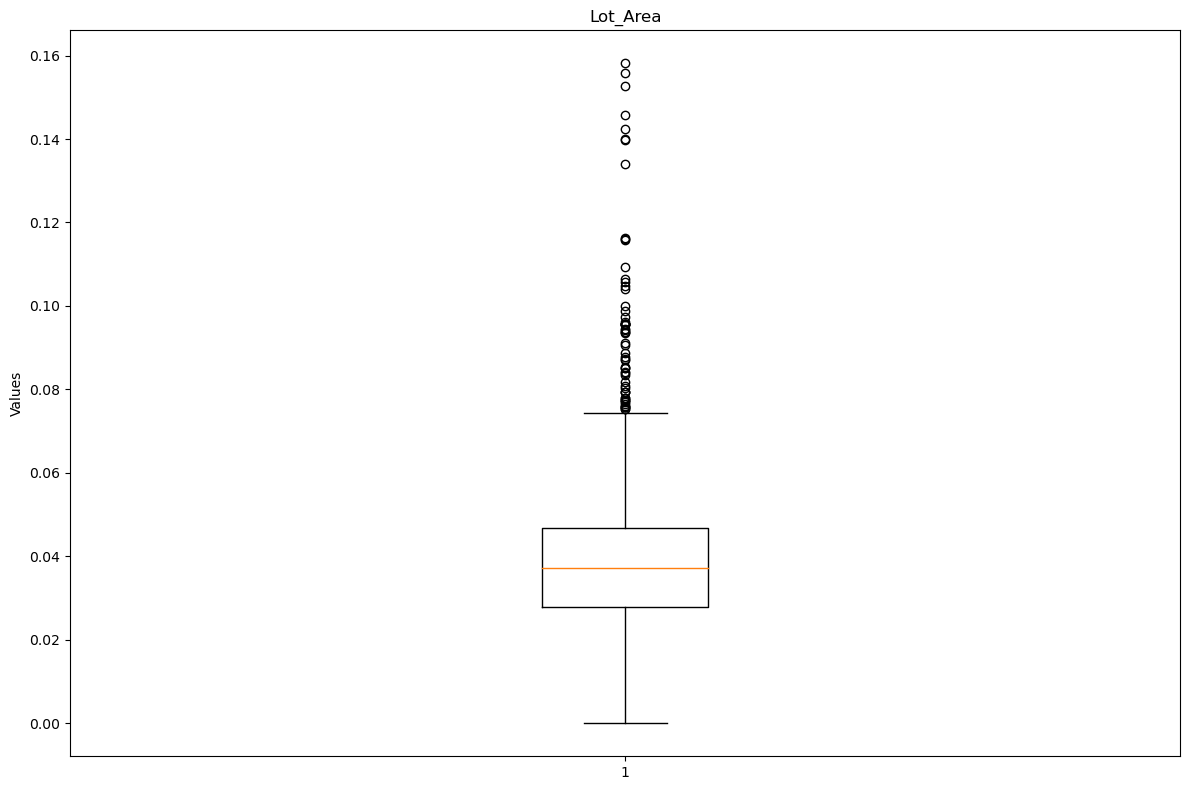

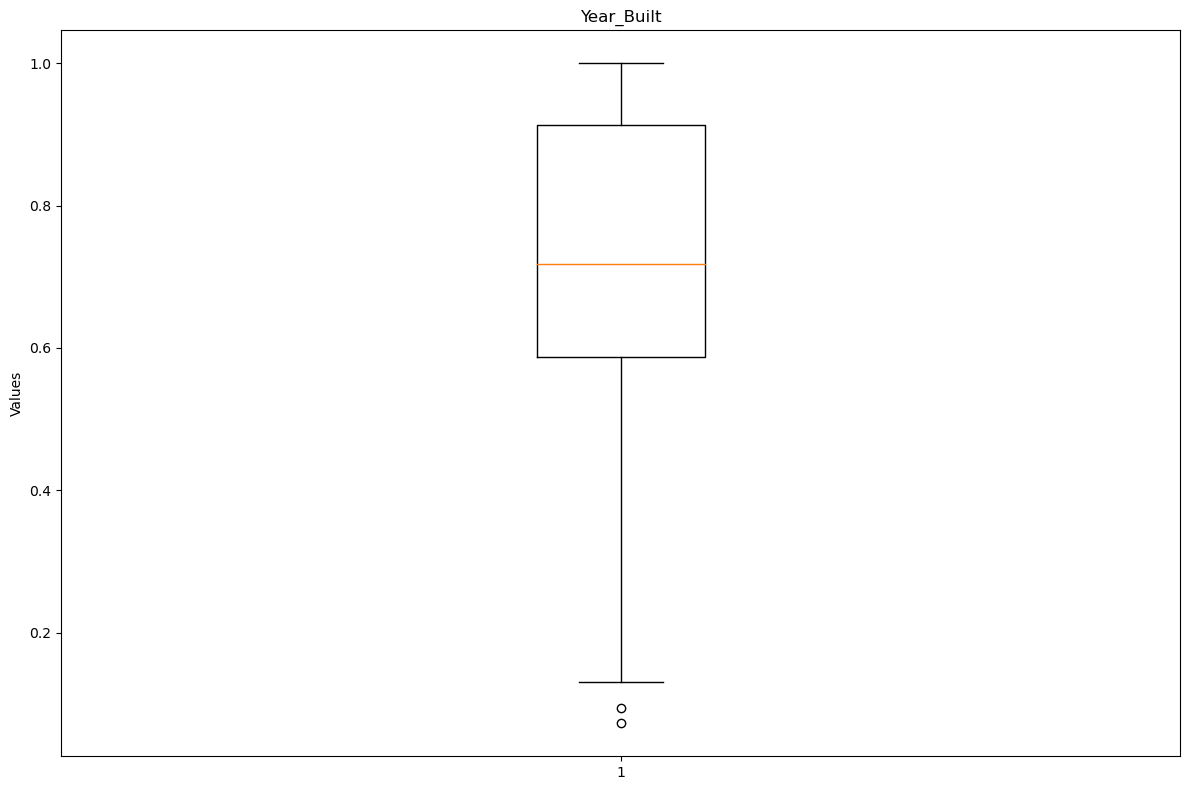

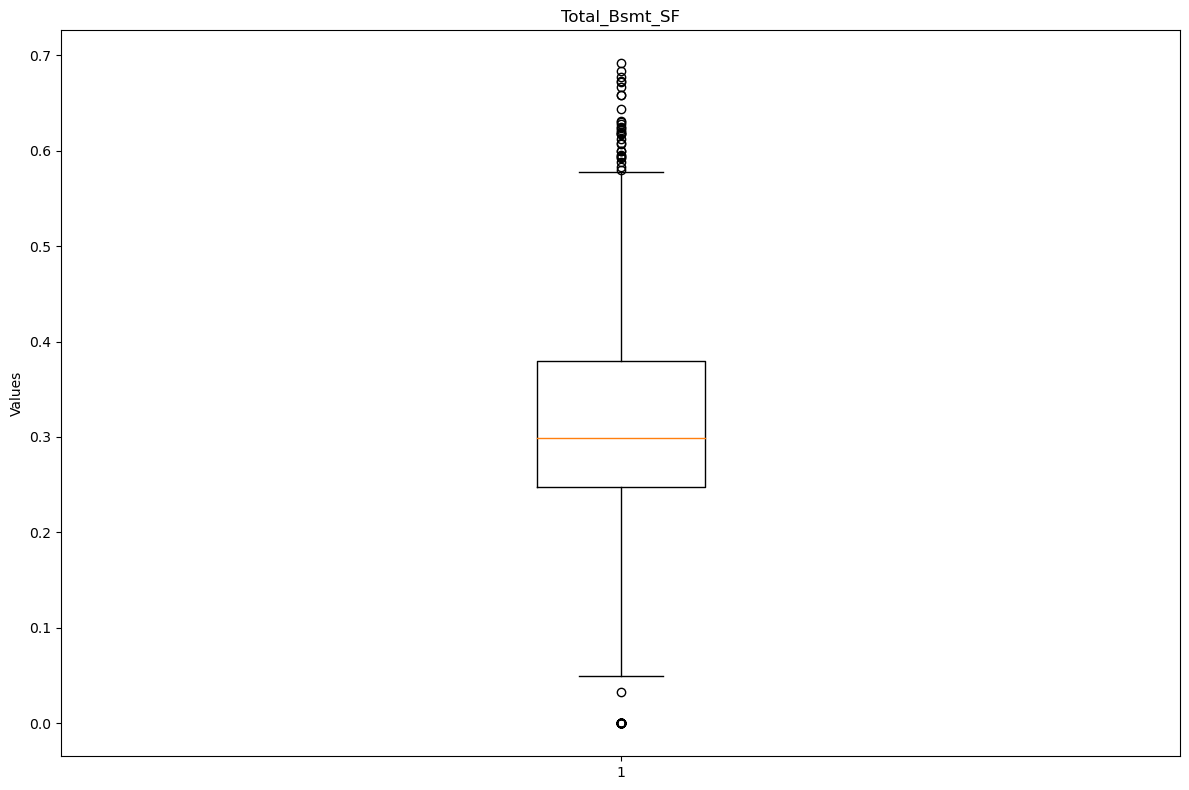

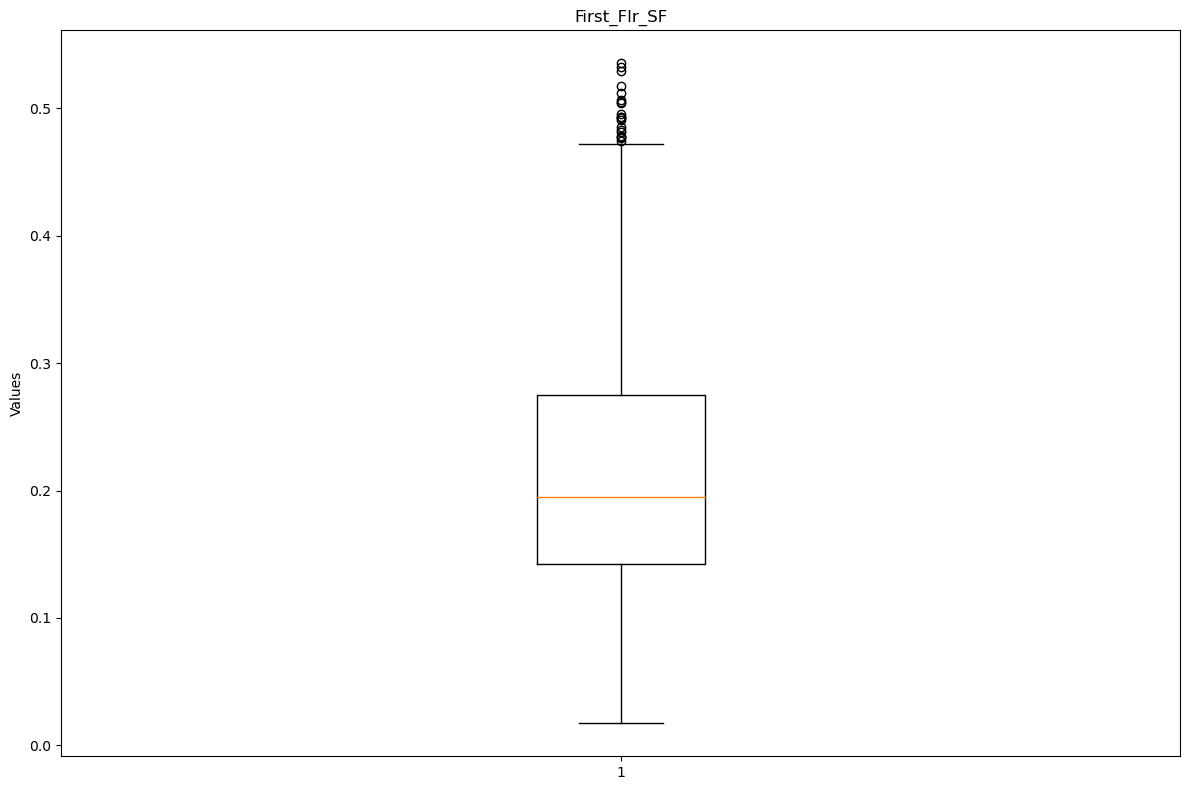

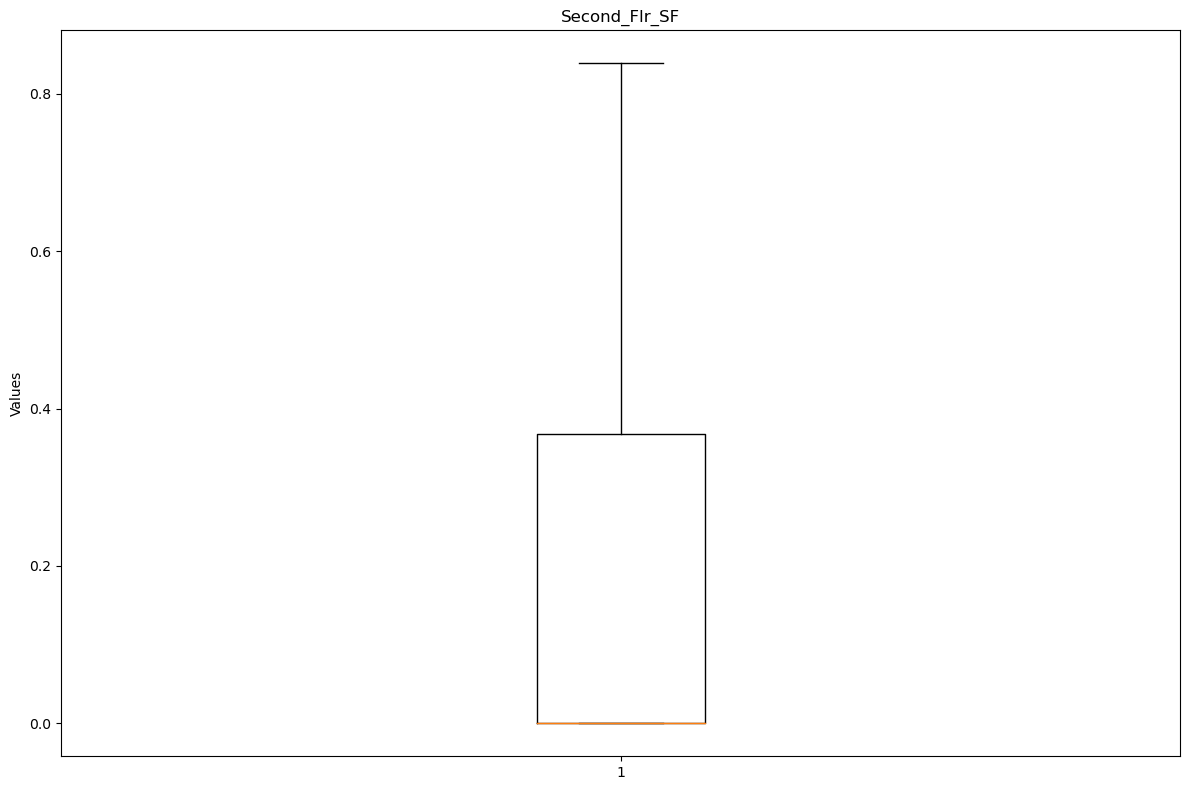

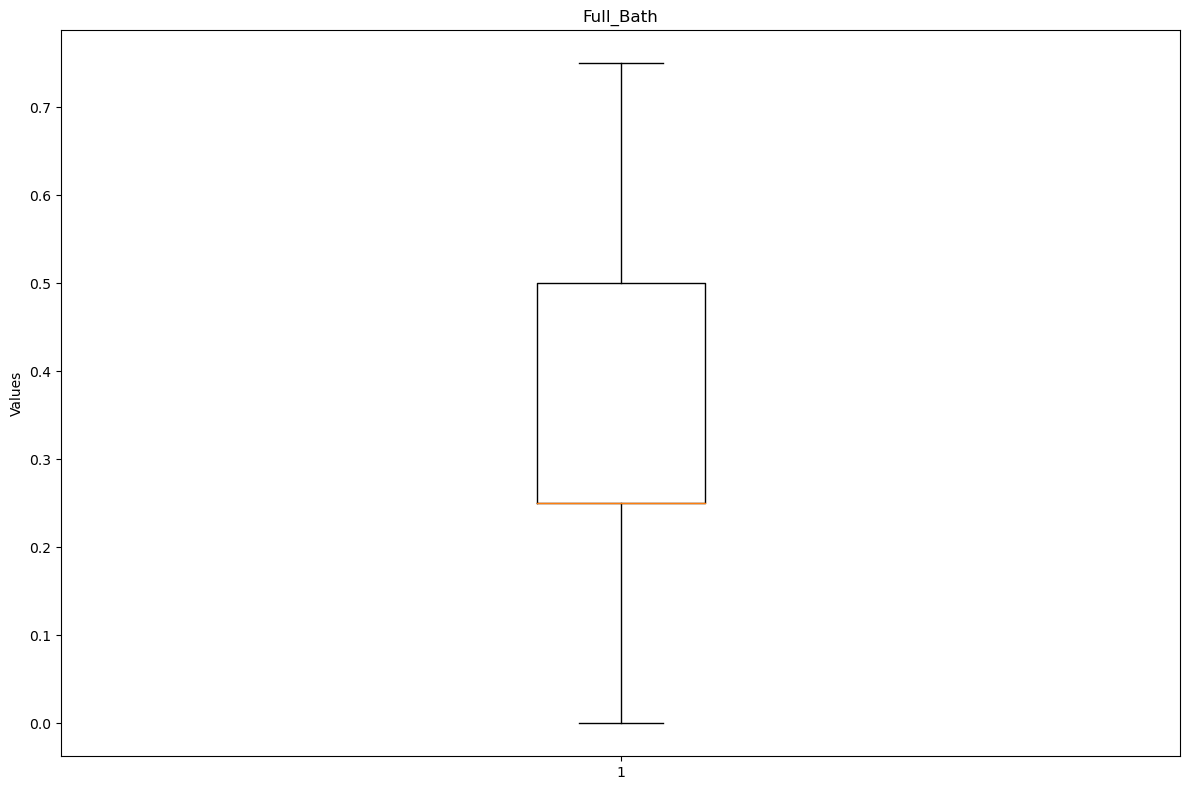

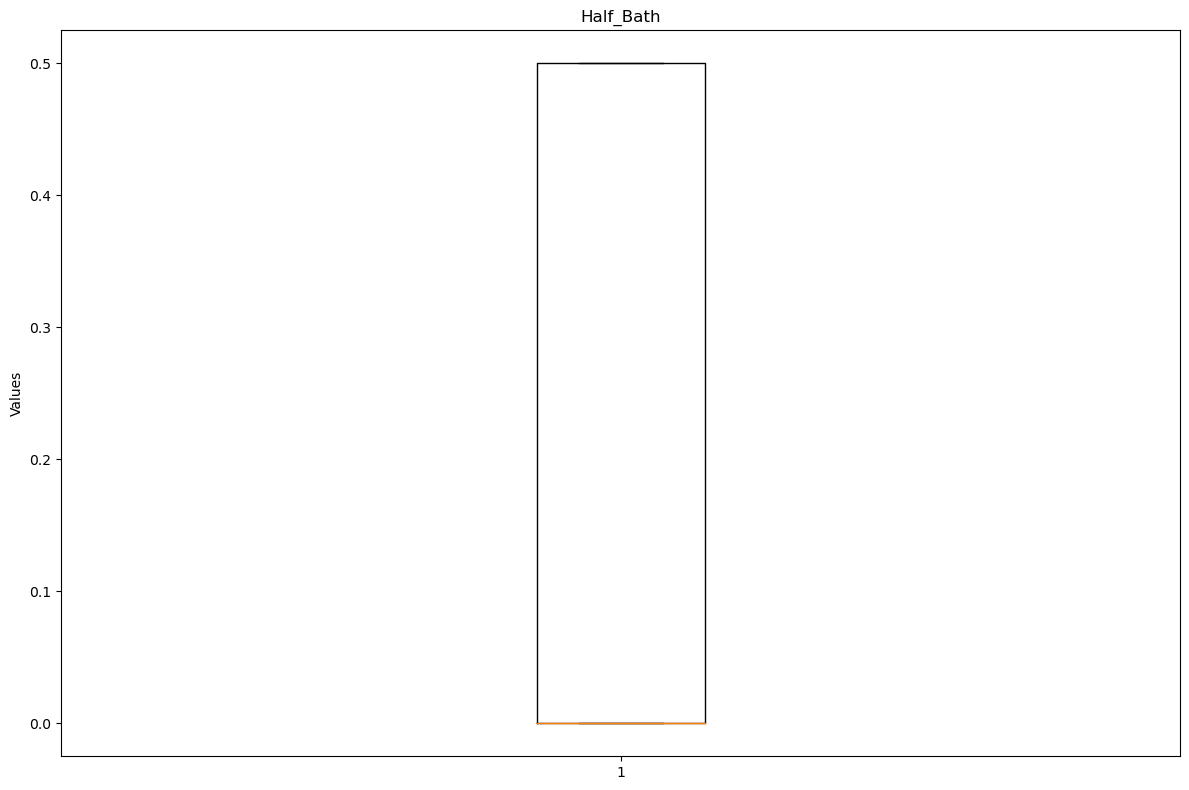

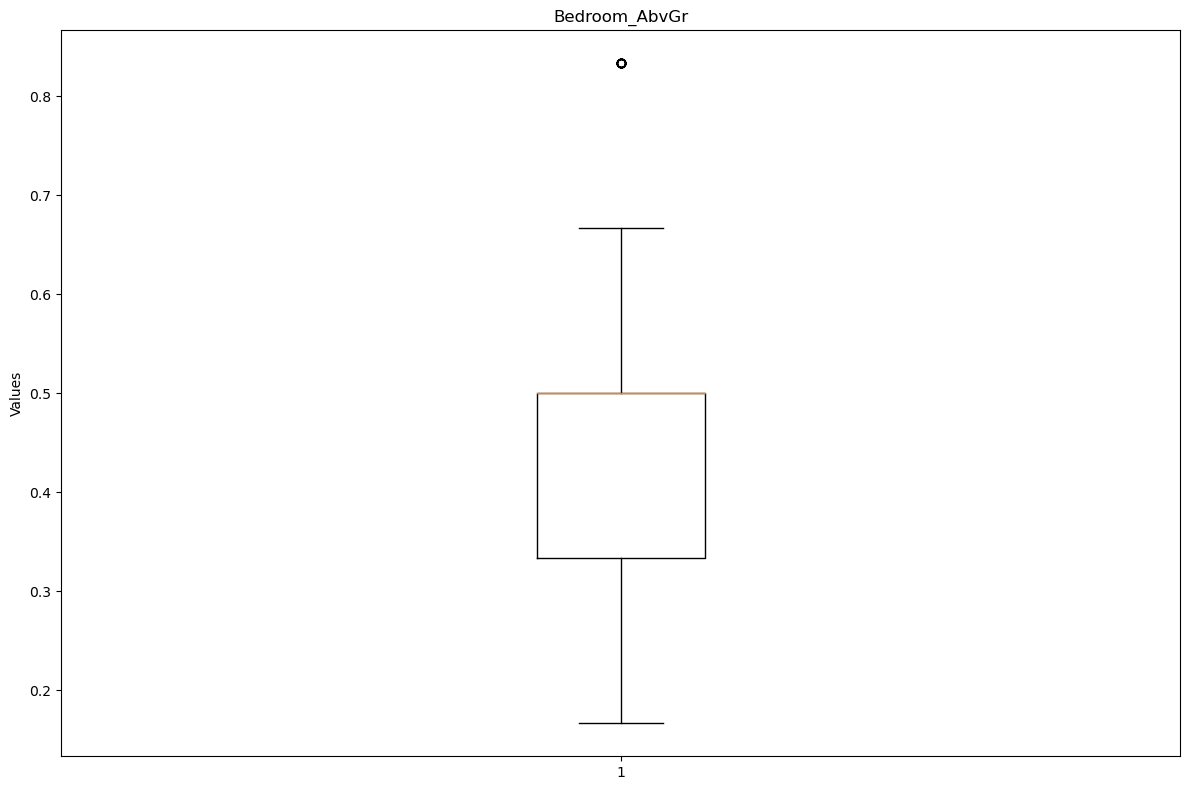

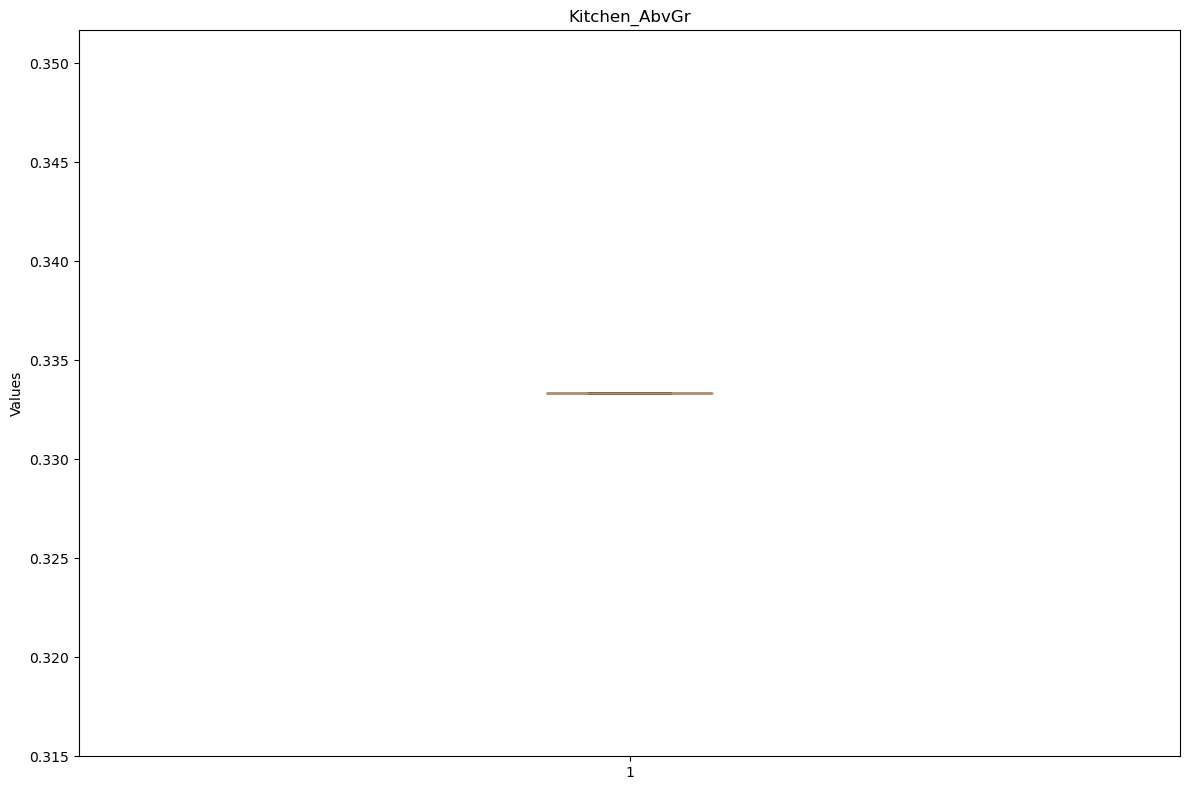

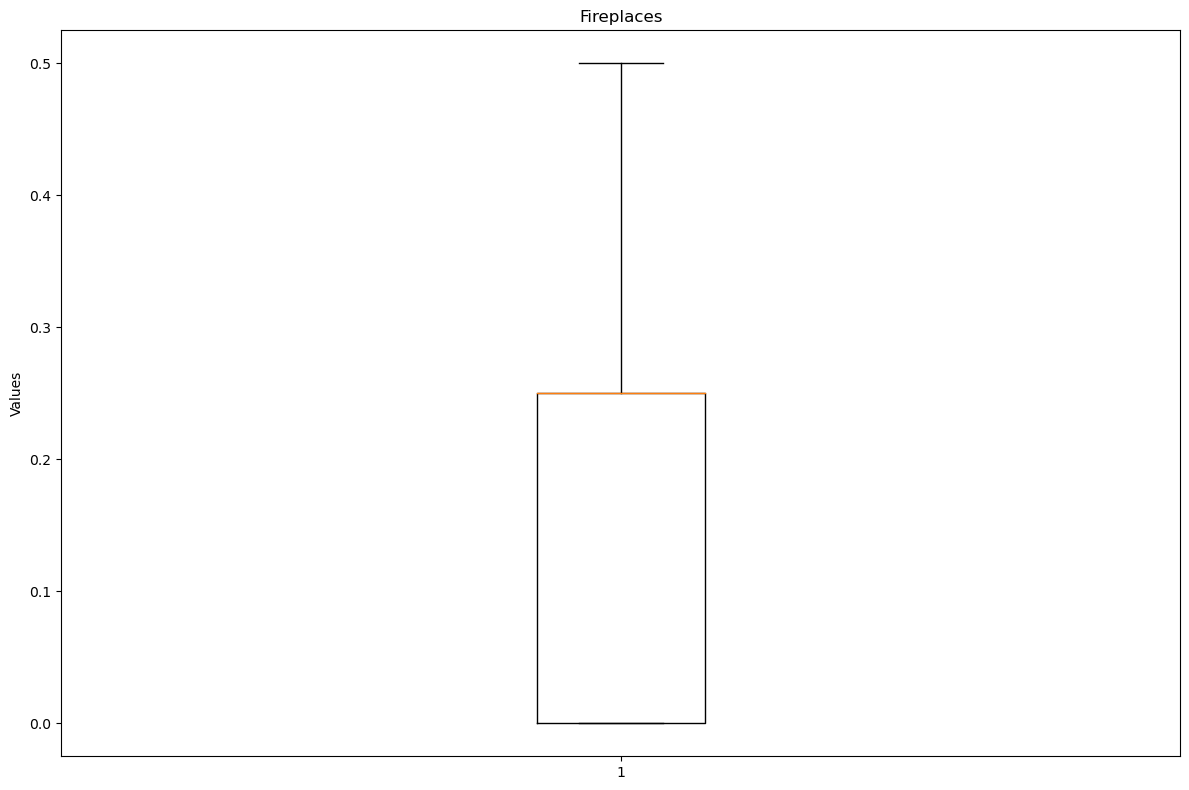

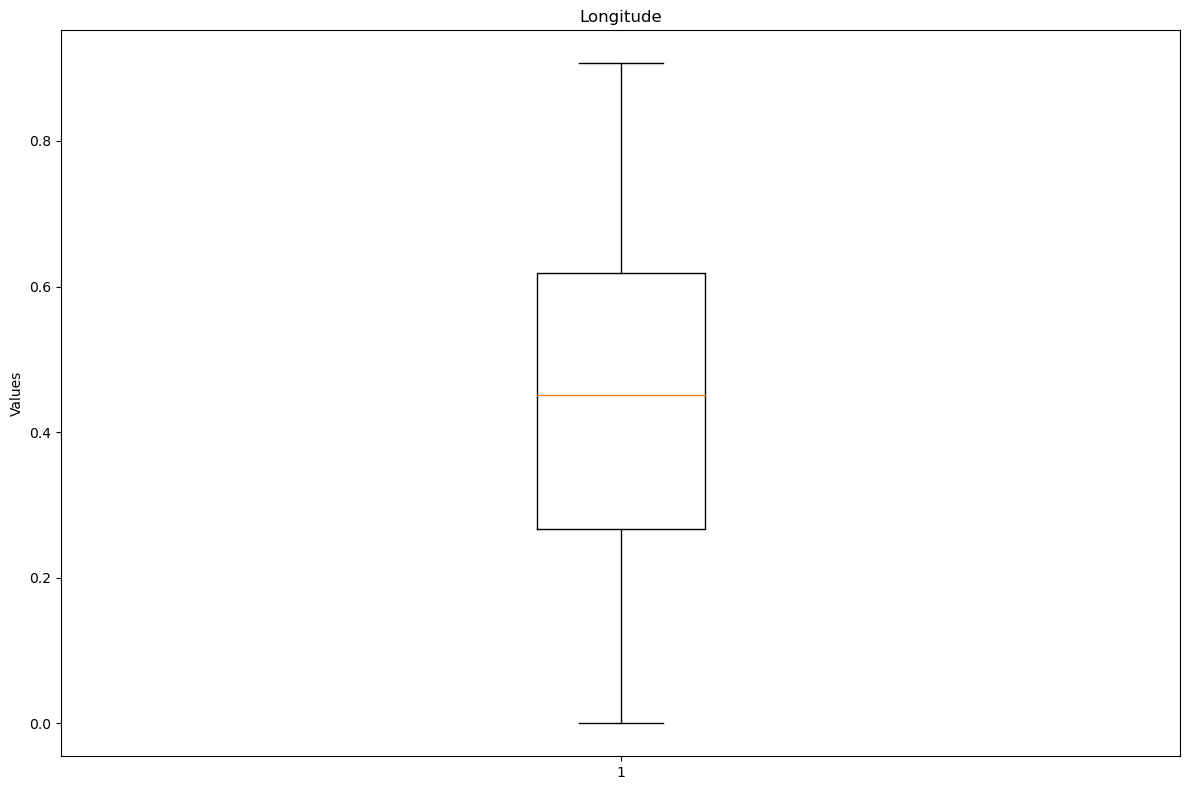

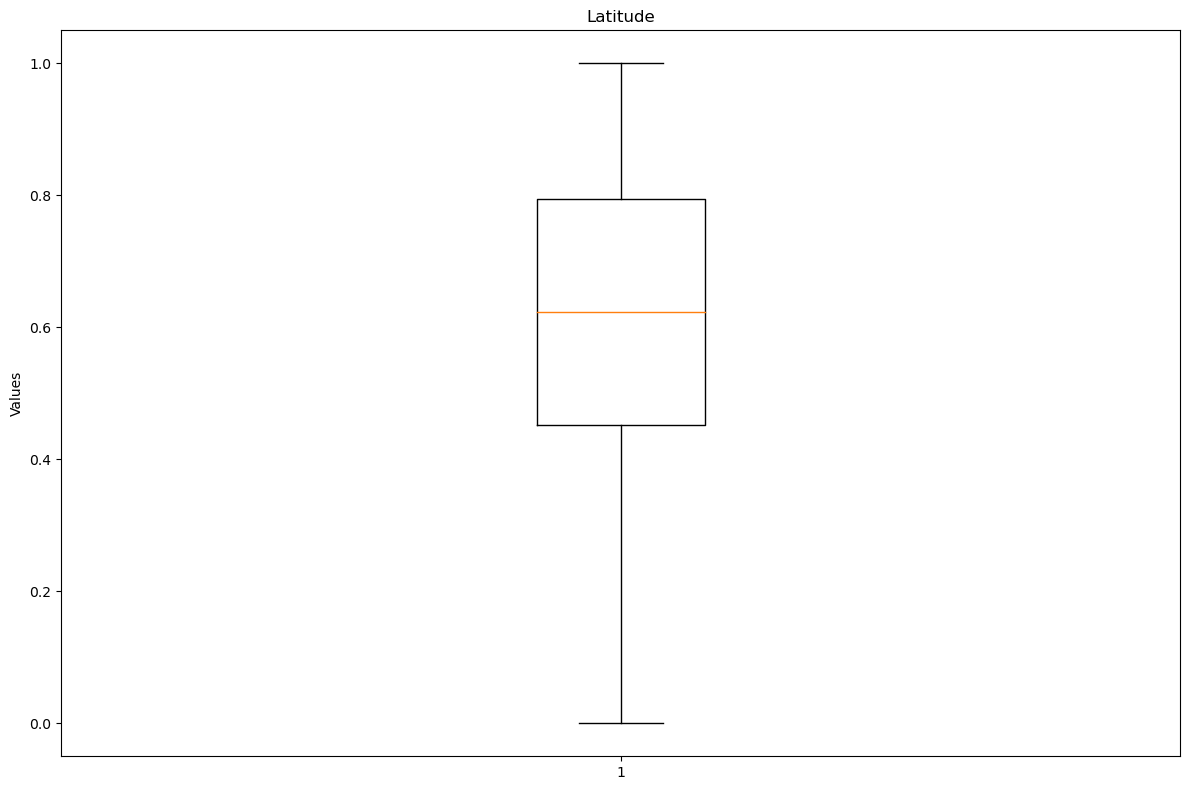

In [26]:
for column in quantitative:
    plt.figure(figsize=(12, 8))
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


# Model1

In [27]:
corr_matrix = X_train.corr()
high_corr_cols = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >=0.8:
            colname = corr_matrix.columns[i]
            high_corr_cols.append(colname)
high_corr_cols

['Second_Flr_SF']

In [28]:
X_train.drop(['Second_Flr_SF'],axis=1,inplace=True)
X_test.drop(['Second_Flr_SF'],axis=1,inplace=True)

In [29]:
X_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1317,0.191693,0.033186,0.25,0.142857,0.125,0.384058,1.0,0.368372,0.295244,0.50,0.0,0.666667,0.333333,0.25,0.357465,0.402073
195,0.207668,0.030382,0.25,0.000000,0.625,0.681159,1.0,0.269495,0.150812,0.25,0.0,0.500000,0.333333,0.00,0.131008,0.564810
220,0.300319,0.042544,0.25,0.000000,0.125,0.992754,1.0,0.382408,0.247680,0.50,0.0,0.500000,0.333333,0.00,0.006075,0.495610
2222,0.207668,0.030382,1.00,0.142857,0.625,0.485507,1.0,0.247349,0.122100,0.25,0.0,0.500000,0.333333,0.25,0.628381,0.609620
1233,0.000000,0.060160,0.25,0.714286,0.125,0.876812,1.0,0.253275,0.211427,0.50,0.5,0.666667,0.333333,0.25,0.096098,0.579807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.201278,0.033195,0.25,0.714286,0.125,0.913043,1.0,0.246101,0.120940,0.50,0.5,0.500000,0.333333,0.25,0.470992,0.931971
1398,0.303514,0.068078,0.25,0.000000,0.000,0.710145,0.5,0.691516,0.535093,0.50,0.0,0.666667,0.333333,0.25,0.655626,0.831710
1072,0.236422,0.035317,0.25,0.000000,0.250,0.615942,1.0,0.366812,0.233179,0.25,0.0,0.500000,0.333333,0.50,0.643926,0.747746
0,0.450479,0.142420,0.25,0.000000,0.125,0.637681,1.0,0.336868,0.372390,0.25,0.0,0.500000,0.333333,0.50,0.634248,0.878432


In [30]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['variable'] = X_train.columns
vif


,VIF,variable
0,1.109403,Lot_Frontage
1,1.522959,Lot_Area
2,1.339259,Bldg_Type
3,2.526820,House_Style
4,1.237464,Overall_Cond
5,2.386457,Year_Built
6,1.123996,Exter_Cond
7,3.131865,Total_Bsmt_SF
8,3.929576,First_Flr_SF
9,2.092053,Full_Bath


In [31]:
X_train.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
X_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
1317,0.191693,0.033186,0.25,0.142857,0.125,0.384058,1.0,0.368372,0.295244,0.50,0.0,0.666667,0.25,0.357465,0.402073
195,0.207668,0.030382,0.25,0.000000,0.625,0.681159,1.0,0.269495,0.150812,0.25,0.0,0.500000,0.00,0.131008,0.564810
220,0.300319,0.042544,0.25,0.000000,0.125,0.992754,1.0,0.382408,0.247680,0.50,0.0,0.500000,0.00,0.006075,0.495610
2222,0.207668,0.030382,1.00,0.142857,0.625,0.485507,1.0,0.247349,0.122100,0.25,0.0,0.500000,0.25,0.628381,0.609620
1233,0.000000,0.060160,0.25,0.714286,0.125,0.876812,1.0,0.253275,0.211427,0.50,0.5,0.666667,0.25,0.096098,0.579807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.201278,0.033195,0.25,0.714286,0.125,0.913043,1.0,0.246101,0.120940,0.50,0.5,0.500000,0.25,0.470992,0.931971
1398,0.303514,0.068078,0.25,0.000000,0.000,0.710145,0.5,0.691516,0.535093,0.50,0.0,0.666667,0.25,0.655626,0.831710
1072,0.236422,0.035317,0.25,0.000000,0.250,0.615942,1.0,0.366812,0.233179,0.25,0.0,0.500000,0.50,0.643926,0.747746
0,0.450479,0.142420,0.25,0.000000,0.125,0.637681,1.0,0.336868,0.372390,0.25,0.0,0.500000,0.50,0.634248,0.878432


In [32]:
X_test.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
X_test

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
1339,0.123077,0.008506,0.50,0.714286,0.000000,0.762712,0.666667,0.251581,0.161727,0.666667,0.5,0.500000,0.333333,0.502521,0.299214
1168,0.266667,0.085493,0.25,0.142857,0.166667,0.415254,1.000000,0.347505,0.385690,0.666667,0.0,0.666667,0.333333,0.766721,0.585622
1198,0.000000,0.152627,0.25,0.000000,0.166667,0.652542,1.000000,0.377020,0.312870,0.333333,0.0,0.500000,0.000000,0.192818,0.586455
2025,0.307692,0.367059,0.25,0.714286,0.166667,0.974576,1.000000,0.257203,0.169348,0.666667,0.5,0.666667,0.333333,0.515188,0.959694
1765,0.358974,0.162156,0.25,0.142857,0.000000,0.542373,1.000000,0.347154,0.276884,0.333333,0.5,0.500000,0.000000,0.269700,0.500416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,0.492308,0.183296,0.25,0.714286,0.166667,0.923729,1.000000,0.298665,0.233700,0.666667,0.5,0.500000,0.333333,0.087424,0.393178
621,0.256410,0.077310,0.25,0.000000,1.000000,0.406780,1.000000,0.066760,0.233700,0.333333,0.0,0.333333,0.000000,0.886699,0.572959
1688,0.435897,0.217572,1.00,0.714286,0.166667,0.084746,1.000000,0.232607,0.460627,0.666667,0.0,0.833333,0.000000,0.816537,0.556040
1813,0.358974,0.111693,0.25,0.000000,0.166667,0.694915,1.000000,0.309909,0.232007,0.333333,0.0,0.500000,0.000000,0.094187,0.449751


In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

model = LinearRegression()
X_train = sm.add_constant(X_train)
model.fit(X_train, Y_train)

#constant has been added.

LinearRegression()

In [34]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     400.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:54:27   Log-Likelihood:                -20995.
No. Observations:                1789   AIC:                         4.202e+04
Df Residuals:                    1773   BIC:                         4.211e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.298e+04   6856.305     -4.810      0.000   -4.64e+04   -1.95e+04
Lot_Frontage   4.196e+04   7365.910      5.697      0.000    2.75e+04    5.64e+04
Lot_Area       2.369e+05    4.7e+04      5.037      0.000    1.45e+05    3.29e+05
Bldg_Type     -1.231e+04   5167.644     -2.383      0.017   -2.25e+04   -2179.487
House_Style    4.905e+04   3527.287     13.907      0.000    4.21e+04     5.6e+04
Overall_Cond   2.594e+04   3083.531      8.411      0.000    1.99e+04     3.2e+04
Year_Built     7.002e+04   5291.539     13.232      0.000    5.96e+04    8.04e+04
Exter_Cond    -4418.0193   3953.454     -1.118      0.264   -1.22e+04    3335.901
Total_Bsmt_SF  1.673e+05   1.11e+04     15.106      0.000    1.46e+05    1.89e+05
First_Flr_SF   1.834e+05   1.48e+04     12.384      0.000    1.54e+05    2.12e+05
Full_Bath      7.885e+04   7960.315      9.905      0.000    6.32e+04    9.45e+04
Half_Bath      3.221e+04   4068.828      7.916      0.000    2.42e+04    4.02e+04
Bedroom_AbvGr -2.241e+04   7275.573     -3.081      0.002   -3.67e+04   -8143.594
Fireplaces      4.66e+04   5500.126      8.472      0.000    3.58e+04    5.74e+04
Longitude     -7280.4448   3561.690     -2.044      0.041   -1.43e+04    -294.892
Latitude       1.135e+04   3224.849      3.519      0.000    5023.450    1.77e+04
==============================================================================
Omnibus:                      259.757   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.661
Skew:                           0.759   Prob(JB):                    1.47e-161
Kurtosis:                       5.762   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X_test = sm.add_constant(X_test)
X_test

,const,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
1339,1.0,0.123077,0.008506,0.50,0.714286,0.000000,0.762712,0.666667,0.251581,0.161727,0.666667,0.5,0.500000,0.333333,0.502521,0.299214
1168,1.0,0.266667,0.085493,0.25,0.142857,0.166667,0.415254,1.000000,0.347505,0.385690,0.666667,0.0,0.666667,0.333333,0.766721,0.585622
1198,1.0,0.000000,0.152627,0.25,0.000000,0.166667,0.652542,1.000000,0.377020,0.312870,0.333333,0.0,0.500000,0.000000,0.192818,0.586455
2025,1.0,0.307692,0.367059,0.25,0.714286,0.166667,0.974576,1.000000,0.257203,0.169348,0.666667,0.5,0.666667,0.333333,0.515188,0.959694
1765,1.0,0.358974,0.162156,0.25,0.142857,0.000000,0.542373,1.000000,0.347154,0.276884,0.333333,0.5,0.500000,0.000000,0.269700,0.500416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1.0,0.492308,0.183296,0.25,0.714286,0.166667,0.923729,1.000000,0.298665,0.233700,0.666667,0.5,0.500000,0.333333,0.087424,0.393178
621,1.0,0.256410,0.077310,0.25,0.000000,1.000000,0.406780,1.000000,0.066760,0.233700,0.333333,0.0,0.333333,0.000000,0.886699,0.572959
1688,1.0,0.435897,0.217572,1.00,0.714286,0.166667,0.084746,1.000000,0.232607,0.460627,0.666667,0.0,0.833333,0.000000,0.816537,0.556040
1813,1.0,0.358974,0.111693,0.25,0.000000,0.166667,0.694915,1.000000,0.309909,0.232007,0.333333,0.0,0.500000,0.000000,0.094187,0.449751


In [36]:
Y_pred=model.predict(X_test)
Y_pred

1339    198019.181328
1168    214465.122891
1198    186469.948534
2025    317463.684708
1765    201733.339851
            ...      
1273    297283.592064
621     115908.902608
1688    223066.693858
1813    167912.946235
134     145060.680982
Length: 483, dtype: float64

In [37]:
Y_test

1339    151000
1168    150000
1198    120000
2025    192140
1765    154000
         ...  
1273    207000
621      91300
1688     90000
1813    112500
134     105000
Name: Sale_Price, Length: 483, dtype: int64

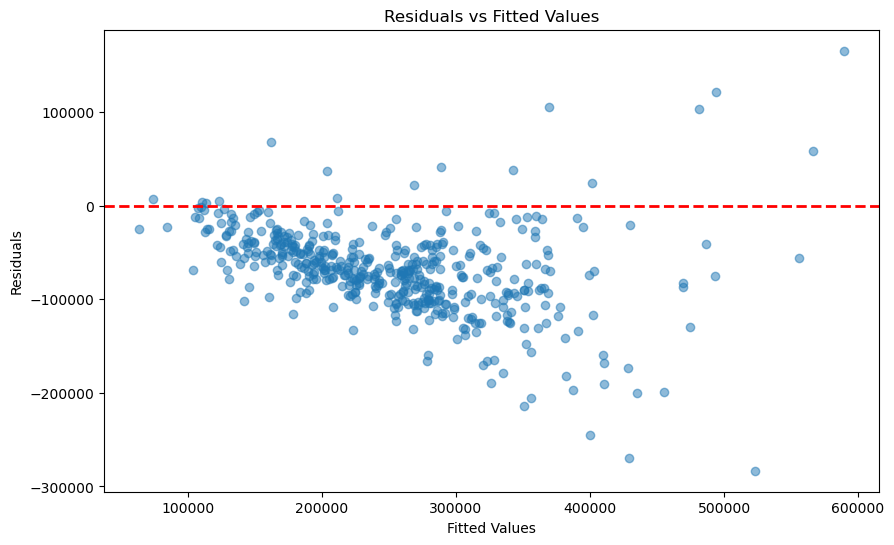

In [38]:
residuals_train = Y_test-Y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


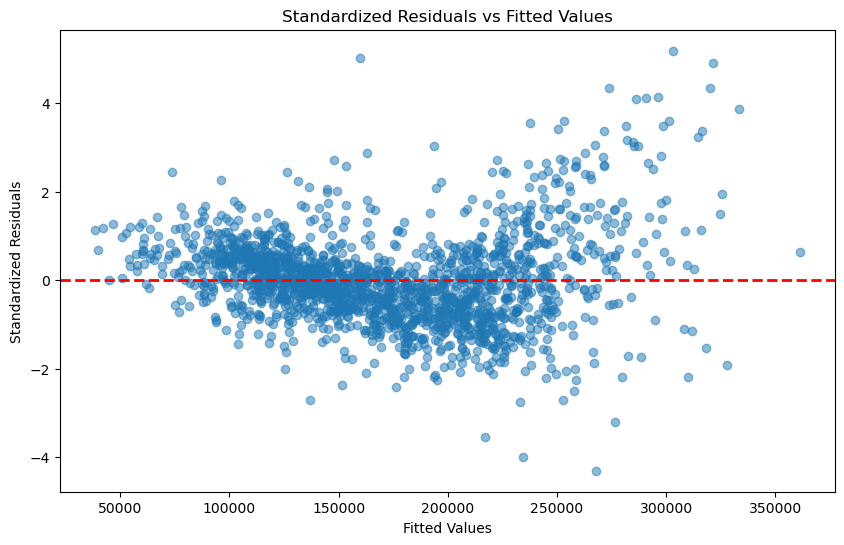

In [39]:
standardized_residuals = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(model.fittedvalues, standardized_residuals, alpha=0.5)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Standardized Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Standardized Residuals')
plt.show()


In [40]:

residuals = model.resid
_, p_value, _, _ = het_breuschpagan(residuals, X_train)
print(f'p-value for Breusch-Pagan test: {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis.evidence of heteroscedasticity.')
else:
    print('Fail to reject the null hypothesis.no evidence of heteroscedasticity.')


p-value for Breusch-Pagan test: 7.135084852806873e-54
Reject the null hypothesis.evidence of heteroscedasticity.


In [41]:
influence = OLSInfluence(model)
cook_distance_values = influence.cooks_distance[0]
print(cook_distance_values)


1317    5.417619e-04
195     5.336029e-05
220     2.153796e-07
2222    1.539631e-04
1233    7.020301e-05
            ...     
12      1.799844e-04
1398    7.682652e-04
1072    4.913132e-04
0       9.972755e-05
99      1.148307e-03
Length: 1789, dtype: float64


In [42]:

durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {durbin_watson_statistic}')
if durbin_watson_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')


Durbin-Watson statistic: 2.022597673020717
No significant autocorrelation detected.


In [46]:
rse = np.sqrt(np.sum((Y_test - Y_pred)**2) / (len(Y_test) - 2))
rse

83759.57072736624

In [47]:
metrics.mean_absolute_error(Y_test,Y_pred)

72775.09110688162

In [48]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

83585.97557551869

# Model2

In [49]:
X_train.drop(['Bldg_Type','Exter_Cond','Longitude'],axis=1,inplace=True)
X_test.drop(['Bldg_Type','Exter_Cond','Longitude'],axis=1,inplace=True)


In [50]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

model = LinearRegression()
X_train = sm.add_constant(X_train)
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     497.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:54:46   Log-Likelihood:                -21001.
No. Observations:                1789   AIC:                         4.203e+04
Df Residuals:                    1776   BIC:                         4.210e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.851e+04   4655.286    -10.421      0.000   -5.76e+04   -3.94e+04
Lot_Frontage   4.462e+04   7307.873      6.106      0.000    3.03e+04     5.9e+04
Lot_Area       2.832e+05   4.48e+04      6.321      0.000    1.95e+05    3.71e+05
House_Style    4.837e+04   3525.740     13.718      0.000    4.15e+04    5.53e+04
Overall_Cond   2.718e+04   3029.493      8.971      0.000    2.12e+04    3.31e+04
Year_Built     7.179e+04   4912.917     14.613      0.000    6.22e+04    8.14e+04
Total_Bsmt_SF  1.661e+05   1.11e+04     14.979      0.000    1.44e+05    1.88e+05
First_Flr_SF   1.811e+05   1.48e+04     12.218      0.000    1.52e+05     2.1e+05
Full_Bath      7.938e+04   7933.740     10.006      0.000    6.38e+04    9.49e+04
Half_Bath      3.236e+04   4077.461      7.936      0.000    2.44e+04    4.04e+04
Bedroom_AbvGr -1.739e+04   7071.638     -2.458      0.014   -3.13e+04   -3515.975
Fireplaces     4.571e+04   5502.400      8.308      0.000    3.49e+04    5.65e+04
Latitude       1.014e+04   3198.504      3.171      0.002    3870.392    1.64e+04
==============================================================================
Omnibus:                      252.989   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.567
Skew:                           0.739   Prob(JB):                    2.79e-158
Kurtosis:                       5.748   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_test = sm.add_constant(X_test)

In [53]:
Y_pred=model.predict(X_test)
Y_pred

1339    198464.178039
1168    218955.089271
1198    189119.075551
2025    334113.005509
1765    206133.165915
            ...      
1273    302347.680439
621     121103.771668
1688    243874.665168
1813    169400.844587
134     150972.114586
Length: 483, dtype: float64

In [54]:
Y_test

1339    151000
1168    150000
1198    120000
2025    192140
1765    154000
         ...  
1273    207000
621      91300
1688     90000
1813    112500
134     105000
Name: Sale_Price, Length: 483, dtype: int64

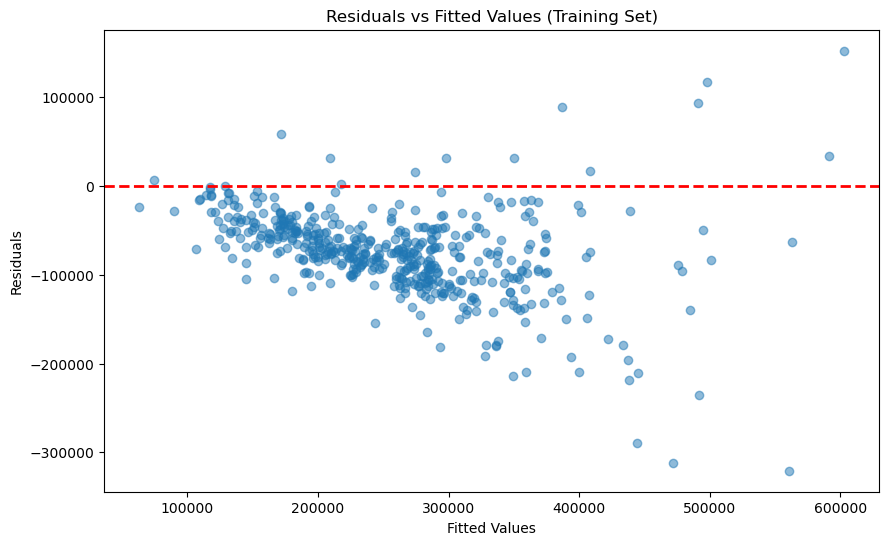

In [55]:
residuals_train = Y_test-Y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


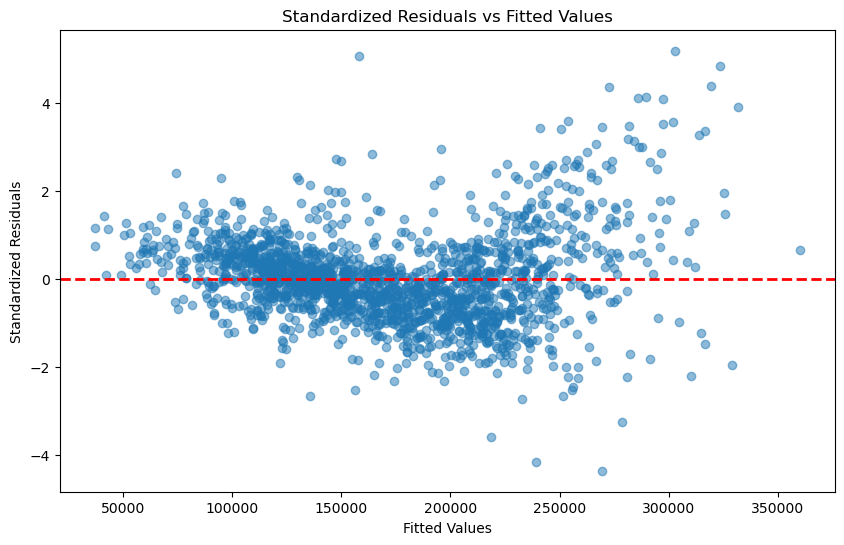

In [56]:
standardized_residuals = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(model.fittedvalues, standardized_residuals, alpha=0.5)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Standardized Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Standardized Residuals')
plt.show()


In [57]:

residuals = model.resid
_, p_value, _, _ = het_breuschpagan(residuals, X_train)
print(f'p-value for Breusch-Pagan test: {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis.evidence of heteroscedasticity.')
else:
    print('Fail to reject the null hypothesis. no evidence of heteroscedasticity.')


p-value for Breusch-Pagan test: 2.1627669913557215e-55
Reject the null hypothesis.evidence of heteroscedasticity.


In [58]:
influence = OLSInfluence(model)
cook_distance_values = influence.cooks_distance[0]
print(cook_distance_values)


1317    5.556780e-04
195     6.429983e-05
220     3.286265e-06
2222    1.289297e-08
1233    9.509691e-05
            ...     
12      1.946814e-04
1398    6.746616e-04
1072    6.071387e-04
0       3.568630e-04
99      1.309250e-03
Length: 1789, dtype: float64


In [59]:

durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {durbin_watson_statistic}')
if durbin_watson_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')


Durbin-Watson statistic: 2.0204605234325244
No significant autocorrelation detected.


In [60]:
rse = np.sqrt(np.sum((Y_test - Y_pred)**2) / (len(Y_test) - 2))
rse

89869.45373356619

In [61]:
metrics.mean_absolute_error(Y_test,Y_pred)

78324.32514232308

In [62]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

89683.19559814528